# Problem Statement
Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.
  In this problem I have to analyse the data given and do all the EDA steps required,so that one can make model based upon my analysis for this data set.

In [1]:
## Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Reading csv file:
df = pd.read_csv(r"customer_retention_dataset_copy1.csv")
pd.set_option('display.max_columns',None)
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [94]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [3]:
df = df.rename(columns = {'1Gender of respondent' :'Gender',
                          '2 How old are you? ': 'Age',
                          '3 Which city do you shop online from?' : 'City',
                          '4 What is the Pin Code of where you shop online from?': 'Pincode',
                          '5 Since How Long You are Shopping Online ?' :'Shopping_Since',
                          '6 How many times you have made an online purchase in the past 1 year?' :'Frequency',
                          '7 How do you access the internet while shopping on-line?' :'internet_Accesibility',
                          '8 Which device do you use to access the online shopping?' :'device_used',
    
                          })

df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet_Accesibility', 'device_used',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\

In [4]:
df.columns = df.columns.str.replace(' ', '')


In [5]:
df.columns = df.columns.str.replace('\t', '')

In [6]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet_Accesibility', 'device_used',
       '9Whatisthescreensizeofyourmobiledevice?',
       '10Whatistheoperatingsystem(OS)ofyourdevice?',
       '11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?',
       '12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?',
       '13Afterfirstvisit,howdoyoureachtheonlineretailstore?',
       '14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?',
       '15WhatisyourpreferredpaymentOption?',
       '16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?',
       '17Whydidyouabandonthe“Bag”,“ShoppingCart”?',
       '18Thecontentonthewebsitemustbeeasytoreadandunderstand',
       '19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison',
       '20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.',
       '21Allrelevantinfor

In [7]:
df = df.rename(columns ={'9Whatisthescreensizeofyourmobiledevice?' : 'Screen_Size',
                         '10Whatistheoperatingsystem(OS)ofyourdevice?':'OS',
                         '11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?':'browser',
                         '12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?':'channel',
                         '13Afterfirstvisit,howdoyoureachtheonlineretailstore?':'method',
                         '14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?':'explore_time',
                         '15WhatisyourpreferredpaymentOption':'Preferred_pay_option',
                         '16How4doyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?':'abandon_frequency',
                         '17Whydidyouabandonthe“Bag”,“ShoppingCart”?':'reason_for_abandon',
                         '18Thecontentonthewebsitemustbeeasytoreadandunderstand':'interpretability_poll',
                         '19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison':'similar_prod_info_poll',
                         '20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision':'Seller_Product_info_poll',
                         '21Allrelevantinformationonlistedproductsmustbestatedclearly' :'product_information_poll',
                         '22Easeofnavigationinwebsite':'navigation_ease_poll',
                         '23Loadingandprocessingspeed':'speed_poll',
                         '24UserfriendlyInterfaceofthewebsite': 'interface_poll',
                         '25ConvenientPaymentmethods' :'Paymentmethods_poll',
                         '26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime':'timely_fullfill_trust_poll',
                         '27Empathy(readinesstoassistwithqueries)towardsthecustomers':'Response_poll',
                         '28Beingabletoguaranteetheprivacyofthecustomer':'Customer_Privacy_poll',
                         '29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)':'Responsivness_poll',
                         '30Onlineshoppinggivesmonetarybenefitanddiscounts' :'benefits_poll',
                         '31Enjoymentisderivedfromshoppingonline':'Enjoyment_poll',
                         '32Shoppingonlineisconvenientandflexible' : 'Convenience_poll',
                         '33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision': "Repalcement_policy_poll",
                         '34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline' : 'Loyality_programs_poll',
                         '35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers':'Quality_inf_poll',
                         '36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication': 'Satisfaction_poll',
                         '37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction' : 'NetBenefit_poll',
                         '38Usersatisfactioncannotexistwithouttrust': 'User_Trust_poll',
                         '39Offeringawidevarietyoflistedproductinseveralcategory':'wide_variety_poll',
                         '40Provisionofcompleteandrelevantproductinformation':'Relevant_Product_Info_poll',
                         '41Monetarysavings':'monetary_savings_poll',
                         '42TheConvenienceofpatronizingtheonlineretailer':'patronizing_poll',
                         '43Shoppingonthewebsitegivesyouthesenseofadventure':'adventure_sense_poll',
                         '44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus':'social_status_poll',
                         '45Youfeelgratificationshoppingonyourfavoritee':'gratification_poll',
                         '46Shoppingonthewebsitehelpsyoufulfillcertainroles':'role_poll',
                         '47Gettingvalueformoneyspent' : 'value_for_money_poll',
                         'Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;':'Shopped_From',
                         'Easytousewebsiteorapplication':'Easy_Web_App',
                         'Visualappealingweb-pagelayout':'Appealing_pagelayout',
                         'Wildvarietyofproductonoffer':'Product_Variety_offer',
                         'Complete,relevantdescriptioninformationofproducts':'Complete_Product_Info',
                         'Fastloadingwebsitespeedofwebsiteandapplication':'fast_website',
                         'Reliabilityofthewebsiteorapplication':'realiable_website',
                         'Quicknesstocompletepurchase': 'quick_purchase',
                         'Availabilityofseveralpaymentoptions':'payment_options',
                         'Speedyorderdelivery' :'Fast_Delivery',
                         'Privacyofcustomers’information':'Privacyofcustomers_info',
                         'Securityofcustomerfinancialinformation':'Financial_Security_Info',
                         'PerceivedTrustworthiness': 'PerceivedTrust_worthiness',
                         'Presenceofonlineassistancethroughmulti-channel': 'multichannel_assistance',
                         'Longertimetogetloggedin(promotion,salesperiod)': 'Long_Login_Time',
                         'Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)':'Long_Display_Time',
                         'Latedeclarationofprice(promotion,salesperiod)': 'Late_Price_Declare',
                         'Longerpageloadingtime(promotion,salesperiod)': 'Long_Loading_Time',
                         'Limitedmodeofpaymentonmostproducts(promotion,salesperiod)' :'limited_pmt_mode',
                         'Longerdeliveryperiod' : 'Late_delivery',
                         'Changeinwebsite/Applicationdesign' :'Website_Design_Change',
                         'Frequentdisruptionwhenmovingfromonepagetoanother':'page_disruption',
                         'Websiteisasefficientasbefore': 'efficiency_webpage',
                         'WhichoftheIndianonlineretailerwouldyourecommendtoafriend' :'recommendation'
                         
                          })

In [8]:
df.head()

Gender          Age           City  Pincode Shopping_Since  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

            Frequency internet_Accesibility device_used Screen_Size  \
0         31-40 times               Dial-up     Desktop      Others   
1  41 times and above                 Wi-Fi  Smartphone  4.7 inches   
2  41 times and above       Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times       Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                 Wi-Fi  Smartphone  4.7 inches   

                      OS        browser            channel           method  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

        explore_time 15WhatisyourpreferredpaymentOption?  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)   
1  more than 15 mins                  Credit/Debit cards   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)   
3          6-10 mins                  Credit/Debit cards   
4  more than 15 mins                  Credit/Debit cards   

  16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?  \
0                                          Sometimes                                             
1                                    Very frequently                                             
2                                          Sometimes                                             
3                                              Never                                             
4                                         Frequently                                             

          reason_for_abandon interpretability_poll similar_prod_info_poll  \
0              Lack of trust             Agree (4)        Indifferent (3)   
1  Promo code not applicable    Strongly agree (5)     Strongly agree (5)   
2  Promo code not applicable    Strongly agree (5)              Agree (4)   
3   Better alternative offer             Agree (4)              Agree (4)   
4   Better alternative offer    Strongly agree (5)        Indifferent (3)   

  20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.  \
0                                    Indifferent (3)                                         
1                                 Strongly agree (5)                                         
2                                          Agree (4)                                         
3                                    Indifferent (3)                                         
4                                    Indifferent (3)                                         

  product_information_poll navigation_ease_poll             speed_poll  \
0                Agree (4)            Agree (4)  Strongly disagree (1)   
1       Strongly agree (5)   Strongly agree (5)     Strongly agree (5)   
2                Agree (4)            Agree (4)              Agree (4)   
3                Agree (4)   Strongly agree (5)              Agree (4)   
4                Agree (4)            Agree (4)     Strongly agree (5)   

       interface_poll Paymentmethods_poll timely_fullfill_trust_poll  \
0       Dis-agree (2)       Dis-agree (2)               Disagree (2)   
1  Strongly agree (5)  Strongly agree (5)         Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)         Strongly agree (5)   

In [9]:
mapping = {df.columns[14]: 'Preferred_pmt_option',
                        df.columns[15] :'abandon_frequency',
                        df.columns[19]: 'Seller_Product_info_poll',
                        df.columns[44] : 'gratification_poll',
                        df.columns[70] : 'recommendation'
          }

df = df.rename(columns= mapping)  
                        

In [10]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet_Accesibility', 'device_used', 'Screen_Size', 'OS', 'browser',
       'channel', 'method', 'explore_time', 'Preferred_pmt_option',
       'abandon_frequency', 'reason_for_abandon', 'interpretability_poll',
       'similar_prod_info_poll', 'Seller_Product_info_poll',
       'product_information_poll', 'navigation_ease_poll', 'speed_poll',
       'interface_poll', 'Paymentmethods_poll', 'timely_fullfill_trust_poll',
       'Response_poll', 'Customer_Privacy_poll', 'Responsivness_poll',
       'benefits_poll', 'Enjoyment_poll', 'Convenience_poll',
       'Repalcement_policy_poll', 'Loyality_programs_poll', 'Quality_inf_poll',
       'Satisfaction_poll', 'NetBenefit_poll', 'User_Trust_poll',
       'wide_variety_poll', 'Relevant_Product_Info_poll',
       'monetary_savings_poll', 'patronizing_poll', 'adventure_sense_poll',
       'social_status_poll', 'gratification_poll', 'role_poll',
       'value_f

In [69]:
print(len(df.columns))

71


In [11]:
df.head()

Gender          Age           City  Pincode Shopping_Since  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

            Frequency internet_Accesibility device_used Screen_Size  \
0         31-40 times               Dial-up     Desktop      Others   
1  41 times and above                 Wi-Fi  Smartphone  4.7 inches   
2  41 times and above       Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times       Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                 Wi-Fi  Smartphone  4.7 inches   

                      OS        browser            channel           method  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

        explore_time                Preferred_pmt_option abandon_frequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1  more than 15 mins                  Credit/Debit cards   Very frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3          6-10 mins                  Credit/Debit cards             Never   
4  more than 15 mins                  Credit/Debit cards        Frequently   

          reason_for_abandon interpretability_poll similar_prod_info_poll  \
0              Lack of trust             Agree (4)        Indifferent (3)   
1  Promo code not applicable    Strongly agree (5)     Strongly agree (5)   
2  Promo code not applicable    Strongly agree (5)              Agree (4)   
3   Better alternative offer             Agree (4)              Agree (4)   
4   Better alternative offer    Strongly agree (5)        Indifferent (3)   

  Seller_Product_info_poll product_information_poll navigation_ease_poll  \
0          Indifferent (3)                Agree (4)            Agree (4)   
1       Strongly agree (5)       Strongly agree (5)   Strongly agree (5)   
2                Agree (4)                Agree (4)            Agree (4)   
3          Indifferent (3)                Agree (4)   Strongly agree (5)   
4          Indifferent (3)                Agree (4)            Agree (4)   

              speed_poll      interface_poll Paymentmethods_poll  \
0  Strongly disagree (1)       Dis-agree (2)       Dis-agree (2)   
1     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2              Agree (4)  Strongly agree (5)  Strongly agree (5)   
3              Agree (4)  Strongly agree (5)  Strongly agree (5)   
4     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   

  timely_fullfill_trust_poll       Response_poll Customer_Privacy_poll  \
0               Disagree (2)  Strongly agree (5)             Agree (4)   
1         Strongly agree (5)  Strongly agree (5)    Strongly agree (5)   
2         Strongly agree (5)  Strongly agree (5)    Strongly agree (5)   
3                  Agree (4)  Strongly agree (5)    Strongly agree (5)   
4                  Agree (4)  Strongly agree (5)             Agree (4)   

   Responsivness_poll       benefits_poll         Enjoyment_poll  \
0           Agree (4)     indifferent (3)  Strongly disagree (1)   
1  Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   
3           Agree (4)           Agree (4)        indifferent (3)   
4  Strongly agree (5)  Strongly agree (5)     Strongly agree (5)   

     Convenience_poll Repalcement_policy_poll Loyality_pro

In [71]:
df.dtypes

Gender                        object
Age                           object
City                          object
Pincode                        int64
Shopping_Since                object
Frequency                     object
internet_Accesibility         object
device_used                   object
Screen_Size                   object
OS                            object
browser                       object
channel                       object
method                        object
explore_time                  object
Preferred_pmt_option          object
abandon_frequency             object
reason_for_abandon            object
interpretability_poll         object
similar_prod_info_poll        object
Seller_Product_info_poll      object
product_information_poll      object
navigation_ease_poll          object
speed_poll                    object
interface_poll                object
Paymentmethods_poll           object
timely_fullfill_trust_poll    object
Response_poll                 object
C

In [72]:
### Categorical columns
df.select_dtypes(include=['object']).columns 

Index(['Gender', 'Age', 'City', 'Shopping_Since', 'Frequency',
       'internet_Accesibility', 'device_used', 'Screen_Size', 'OS', 'browser',
       'channel', 'method', 'explore_time', 'Preferred_pmt_option',
       'abandon_frequency', 'reason_for_abandon', 'interpretability_poll',
       'similar_prod_info_poll', 'Seller_Product_info_poll',
       'product_information_poll', 'navigation_ease_poll', 'speed_poll',
       'interface_poll', 'Paymentmethods_poll', 'timely_fullfill_trust_poll',
       'Response_poll', 'Customer_Privacy_poll', 'Responsivness_poll',
       'benefits_poll', 'Enjoyment_poll', 'Convenience_poll',
       'Repalcement_policy_poll', 'Loyality_programs_poll', 'Quality_inf_poll',
       'Satisfaction_poll', 'NetBenefit_poll', 'User_Trust_poll',
       'wide_variety_poll', 'Relevant_Product_Info_poll',
       'monetary_savings_poll', 'patronizing_poll', 'adventure_sense_poll',
       'social_status_poll', 'gratification_poll', 'role_poll',
       'value_for_money_po

In [73]:
print(len(df.select_dtypes(include=['object']).columns))

70


There are 70 categorical columns in this dataset.

In [74]:
## Numerical columns
df._get_numeric_data().columns


Index(['Pincode'], dtype='object')

In [75]:
print(len(df._get_numeric_data().columns))

1


There are 1 numerical columns present in dataset.

In [76]:
df.shape

(269, 71)

There are 269 rows and 71 columns.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      269 non-null    object
 1   Age                         269 non-null    object
 2   City                        269 non-null    object
 3   Pincode                     269 non-null    int64 
 4   Shopping_Since              269 non-null    object
 5   Frequency                   269 non-null    object
 6   internet_Accesibility       269 non-null    object
 7   device_used                 269 non-null    object
 8   Screen_Size                 269 non-null    object
 9   OS                          269 non-null    object
 10  browser                     269 non-null    object
 11  channel                     269 non-null    object
 12  method                      269 non-null    object
 13  explore_time                269 non-null    object

In [78]:
## Again rechecking for null values
pd.options.display.min_rows = 100

df.isnull().sum()

Gender                        0
Age                           0
City                          0
Pincode                       0
Shopping_Since                0
Frequency                     0
internet_Accesibility         0
device_used                   0
Screen_Size                   0
OS                            0
browser                       0
channel                       0
method                        0
explore_time                  0
Preferred_pmt_option          0
abandon_frequency             0
reason_for_abandon            0
interpretability_poll         0
similar_prod_info_poll        0
Seller_Product_info_poll      0
product_information_poll      0
navigation_ease_poll          0
speed_poll                    0
interface_poll                0
Paymentmethods_poll           0
timely_fullfill_trust_poll    0
Response_poll                 0
Customer_Privacy_poll         0
Responsivness_poll            0
benefits_poll                 0
                             ..
patroniz

There is not any null value present in  this dataset.

In [79]:
## Getting unique values for each column.
df.nunique()

Gender                         2
Age                            5
City                          11
Pincode                       39
Shopping_Since                 5
Frequency                      6
internet_Accesibility          4
device_used                    4
Screen_Size                    4
OS                             3
browser                        4
channel                        3
method                         5
explore_time                   5
Preferred_pmt_option           3
abandon_frequency              4
reason_for_abandon             5
interpretability_poll          4
similar_prod_info_poll         4
Seller_Product_info_poll       5
product_information_poll       4
navigation_ease_poll           4
speed_poll                     5
interface_poll                 5
Paymentmethods_poll            3
timely_fullfill_trust_poll     4
Response_poll                  4
Customer_Privacy_poll          3
Responsivness_poll             4
benefits_poll                  5
          

In [80]:
df.describe(include='all')

Gender          Age   City        Pincode Shopping_Since  \
count      269          269    269     269.000000            269   
unique       2            5     11            NaN              5   
top     Female  31-40 years  Delhi            NaN  Above 4 years   
freq       181           81     58            NaN             98   
mean       NaN          NaN    NaN  220465.747212            NaN   
std        NaN          NaN    NaN  140524.341051            NaN   
min        NaN          NaN    NaN  110008.000000            NaN   
25%        NaN          NaN    NaN  122018.000000            NaN   
50%        NaN          NaN    NaN  201303.000000            NaN   
75%        NaN          NaN    NaN  201310.000000            NaN   
max        NaN          NaN    NaN  560037.000000            NaN   

                 Frequency internet_Accesibility device_used Screen_Size  \
count                  269                   269         269         269   
unique                   6                     4           4           4   
top     Less than 10 times       Mobile internet  Smartphone      Others   
freq                   114                   142         141         134   
mean                   NaN                   NaN         NaN         NaN   
std                    NaN                   NaN         NaN         NaN   
min                    NaN                   NaN         NaN         NaN   
25%                    NaN                   NaN         NaN         NaN   
50%                    NaN                   NaN         NaN         NaN   
75%                    NaN                   NaN         NaN         NaN   
max                    NaN                   NaN         NaN         NaN   

                           OS        browser        channel         method  \
count                     269            269            269            269   
unique                      3              4              3              5   
top     Window/windows Mobile  Google chrome  Search Engine  Search Engine   
freq                      122            216            230             87   
mean                      NaN            NaN            NaN            NaN   
std                       NaN            NaN            NaN            NaN   
min                       NaN            NaN            NaN            NaN   
25%                       NaN            NaN            NaN            NaN   
50%                       NaN            NaN            NaN            NaN   
75%                       NaN            NaN            NaN            NaN   
max                       NaN            NaN            NaN            NaN   

             explore_time Preferred_pmt_option abandon_frequency  \
count                 269                  269               269   
unique                  5                    3                 4   
top     more than 15 mins   Credit/Debit cards         Sometimes   
freq                  123                  148               171   
mean                  NaN                  NaN               NaN   
std                   NaN                  NaN               NaN   
min                   NaN                  NaN               NaN   
25%                   NaN                  NaN               NaN   
50%                   NaN                  NaN               NaN   
75%                   NaN                  NaN               NaN   
max                   NaN                  NaN               NaN   

              reason_for_abandon interpretability_poll similar_prod_info_poll  \
count                        269                   269                    269   
unique                         5                     4                      4   
top     Better alternative offer    Strongly agree (5)     Strongly agree (5)   
freq                         133                   164                    116   
mean                         NaN                   NaN                    NaN   
std                          NaN      

Nan Values are shown ,because dataset has all categorical columns except Pincode.

In [81]:
## Value Counts for columns
for i in df.columns:
    print(f"{i}: \n")
    print(df[i].value_counts(ascending = True))
    print("----------------")
    print(f" There are {len(df[i].value_counts())} values in column {i}")
    print("-------------------")
    print("\n")

Gender: 

Male       88
Female    181
Name: Gender, dtype: int64
----------------
 There are 2 values in column Gender
-------------------


Age: 

51 years and above    19
Less than 20 years    20
41-50 yaers           70
21-30 years           79
31-40 years           81
Name: Age, dtype: int64
----------------
 There are 5 values in column Age
-------------------


City: 

Bulandshahr       2
Moradabad         5
Merrut            9
Gurgaon          12
Solan            18
Ghaziabad        18
Karnal           27
Bangalore        37
Noida            40
Greater Noida    43
Delhi            58
Name: City, dtype: int64
----------------
 There are 11 values in column City
-------------------


Pincode: 

203202     1
560001     1
203207     1
203001     2
560013     3
110039     4
110009     4
560018     4
201001     4
560003     4
122009     4
560002     4
201304     4
110042     4
201303     4
110030     4
201005     4
201008     5
201009     5
201305     5
530068     5
201312     5
24400

** during data analysis I found that for internet_Accesibility column,duplicate value for Mobile Internet.  
** Frequency column has 6 values,but we can replace 42 times and above with 41 times and above.

In [12]:
df['Frequency'] = df['Frequency'].replace('42 times and above', '41 times and above')
df['internet_Accesibility'] = df['internet_Accesibility'].replace('Mobile internet', 'Mobile Internet')


# Visualization

# Univariate Analysis

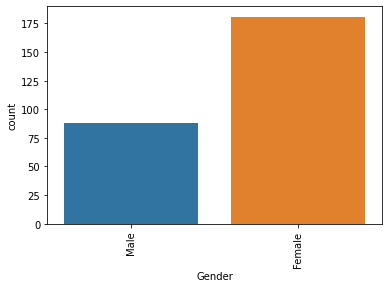

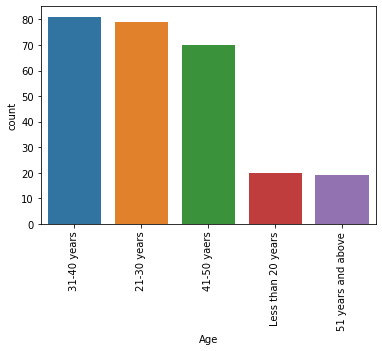

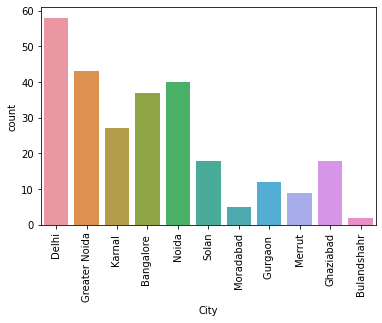

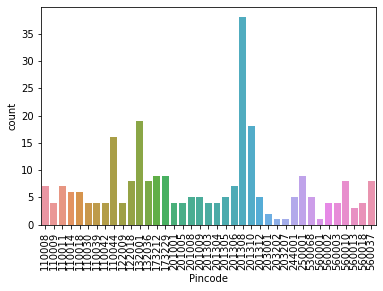

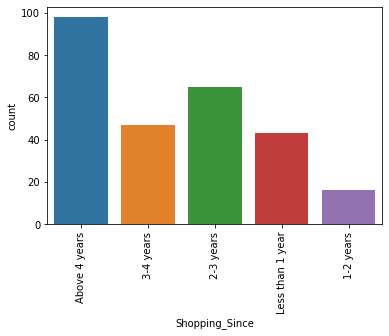

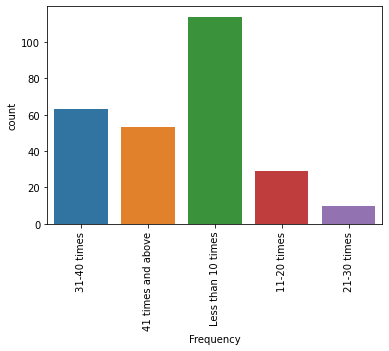

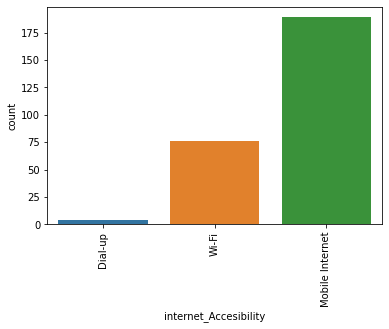

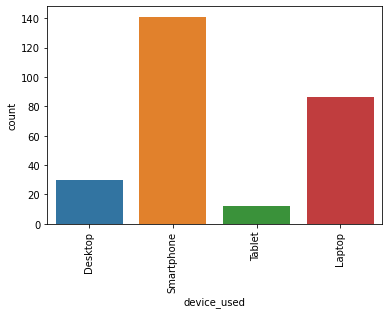

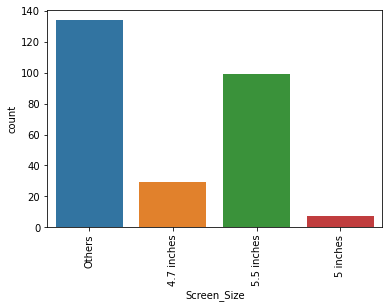

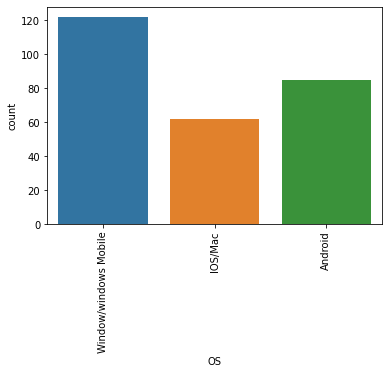

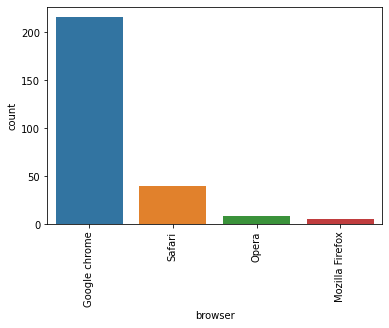

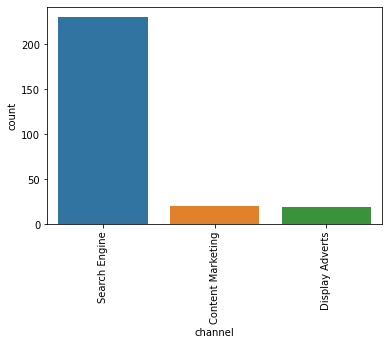

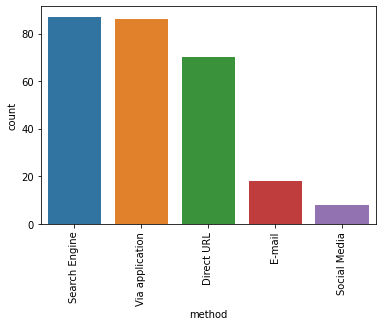

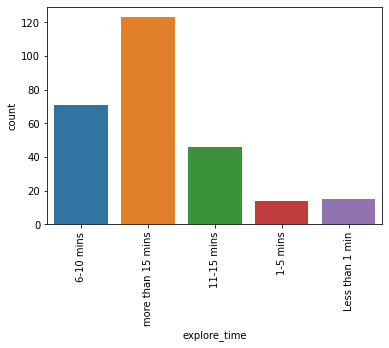

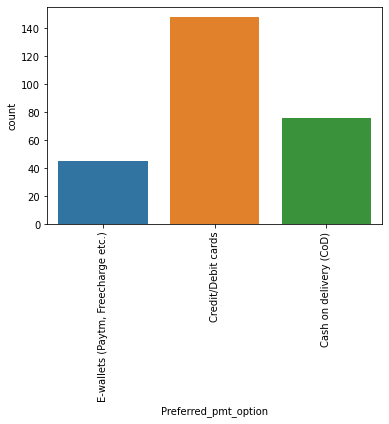

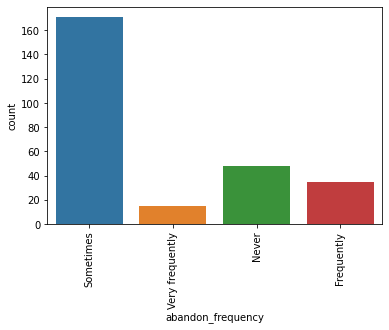

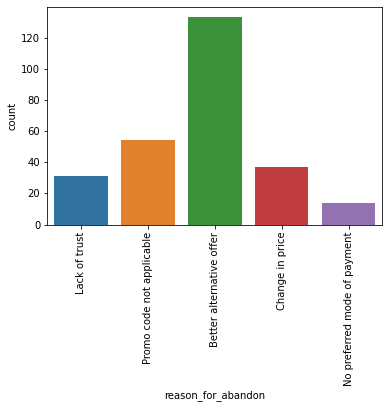

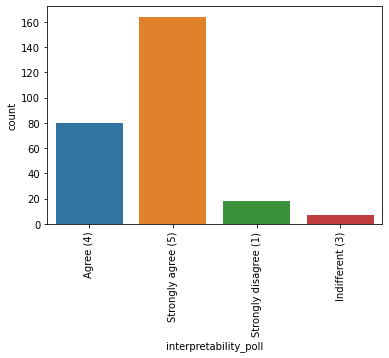

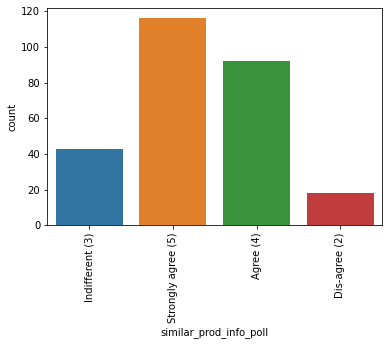

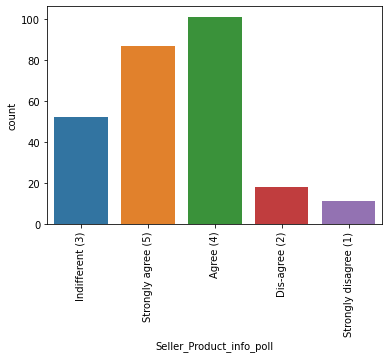

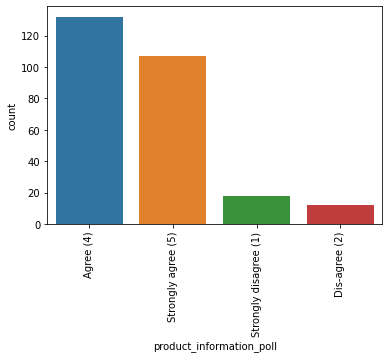

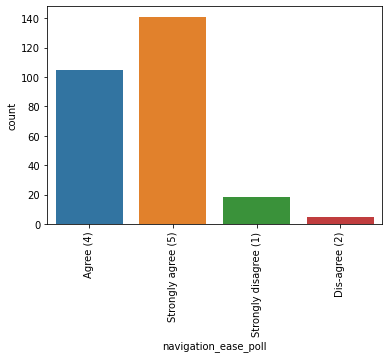

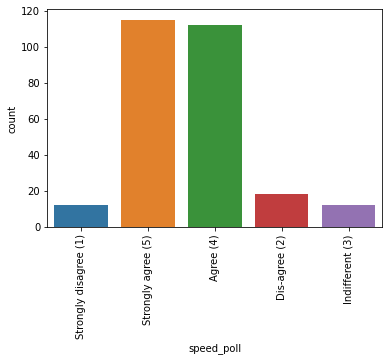

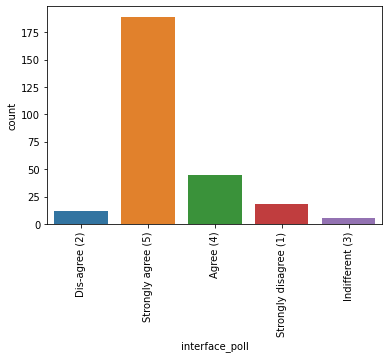

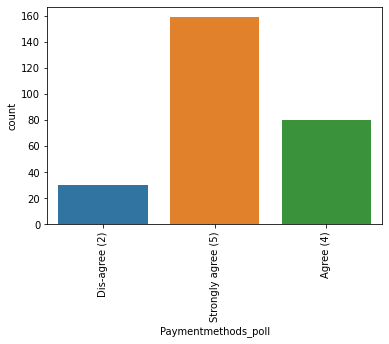

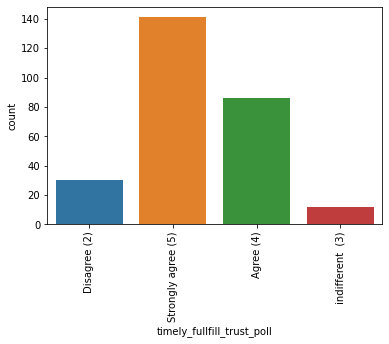

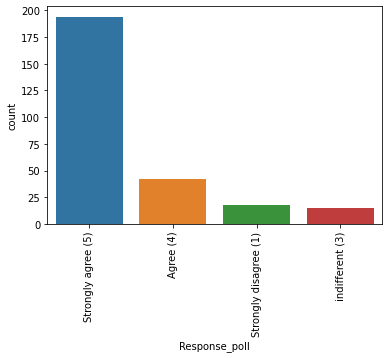

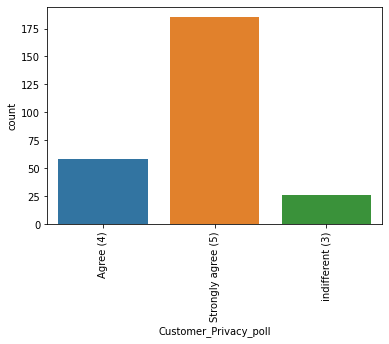

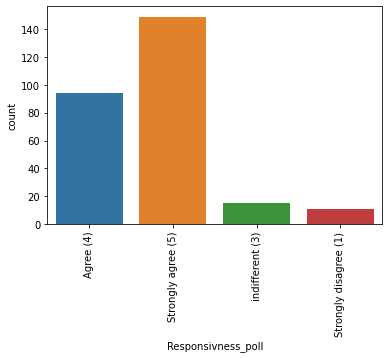

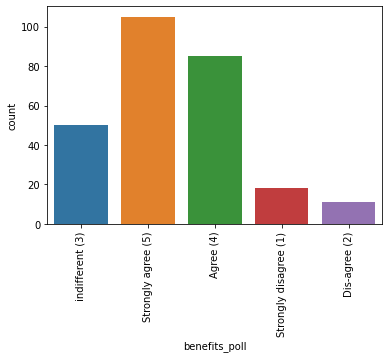

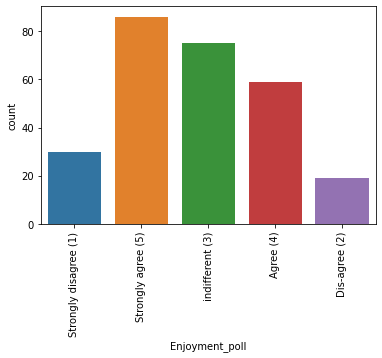

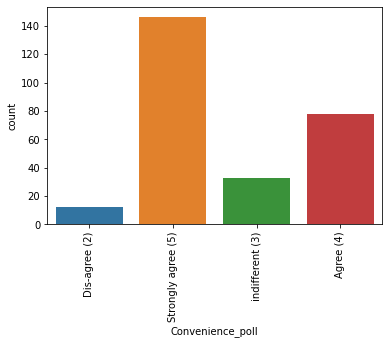

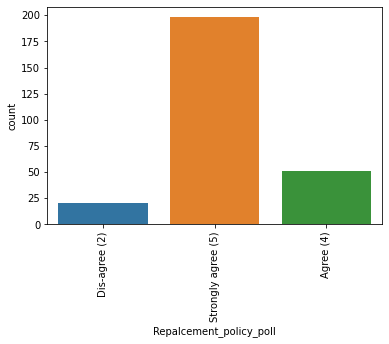

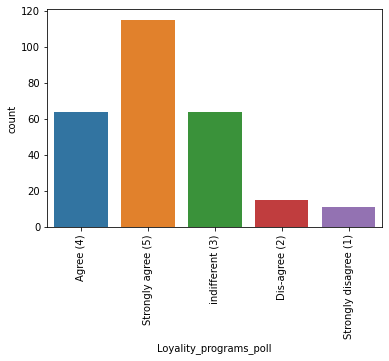

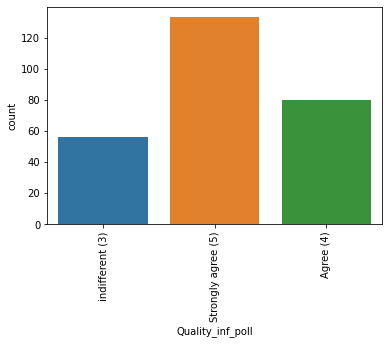

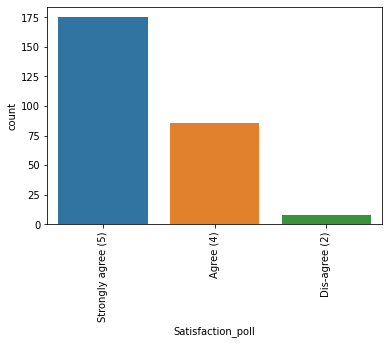

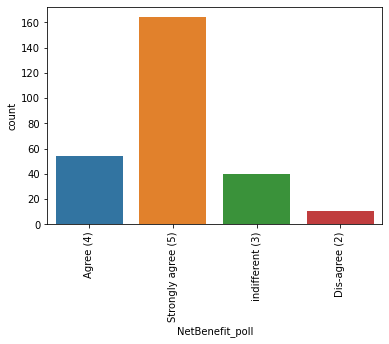

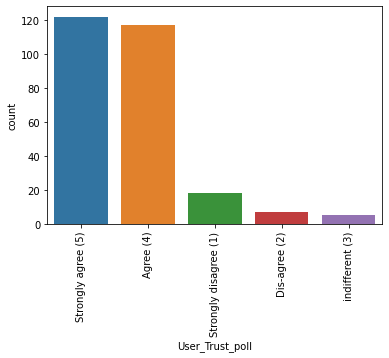

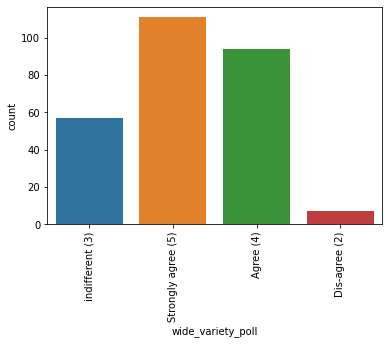

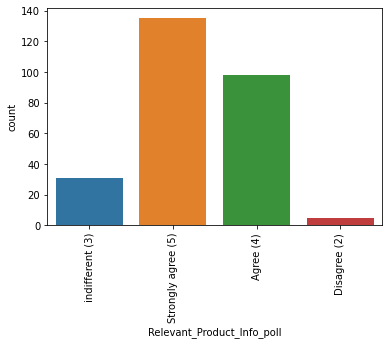

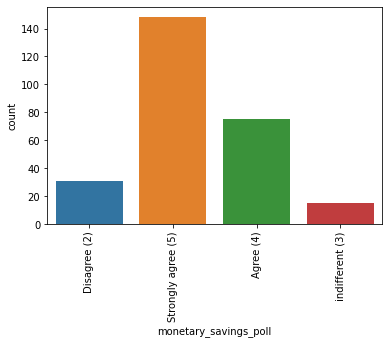

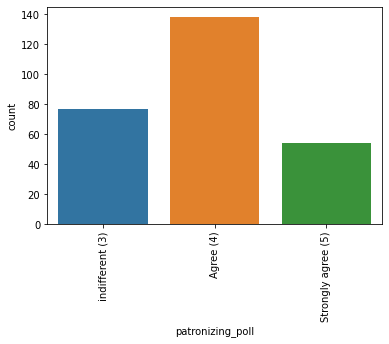

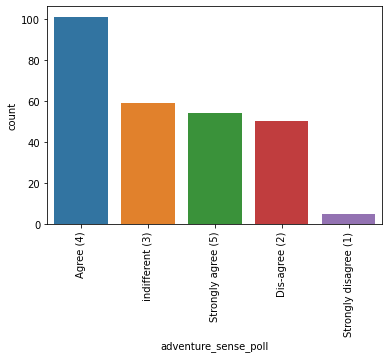

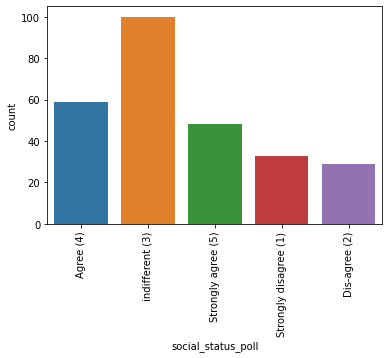

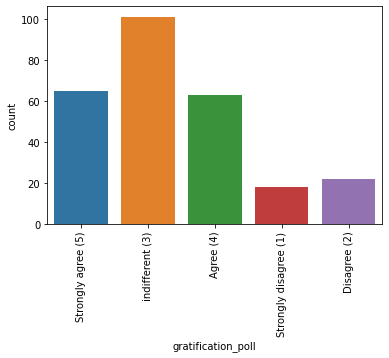

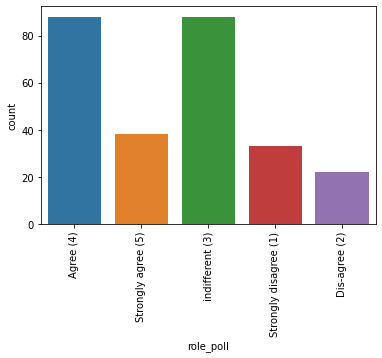

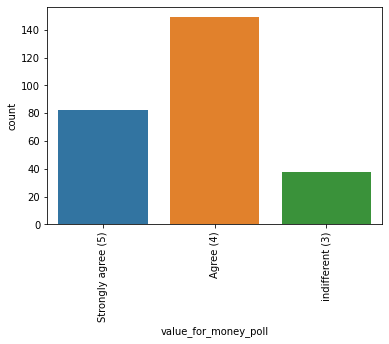

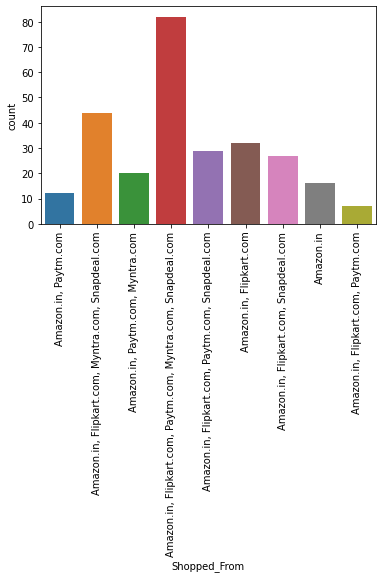

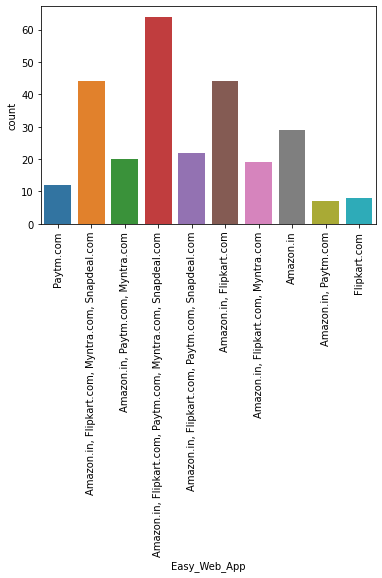

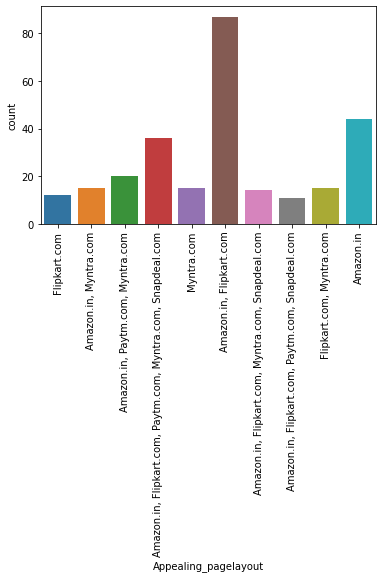

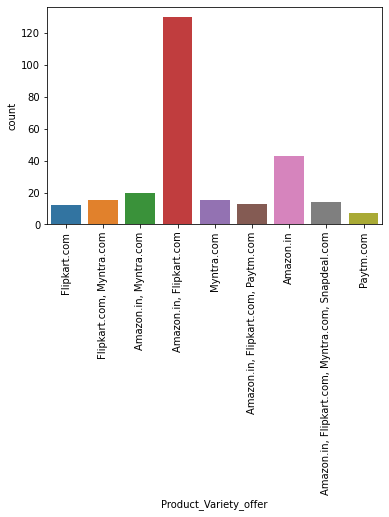

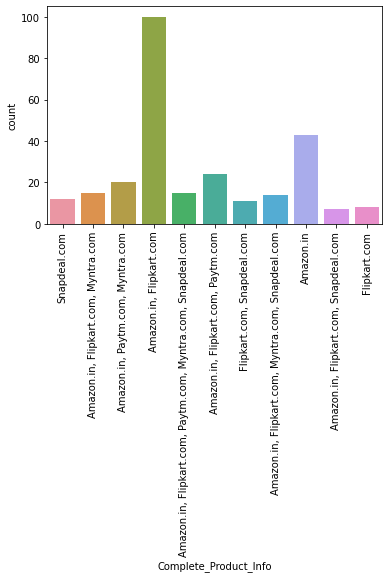

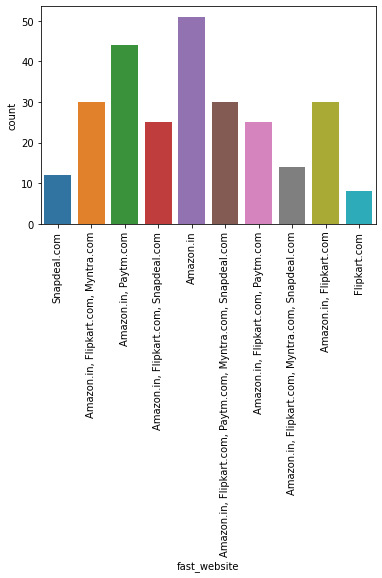

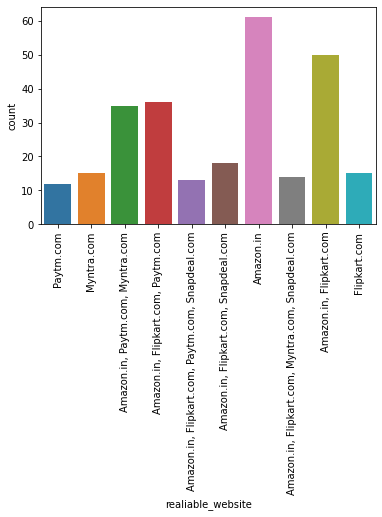

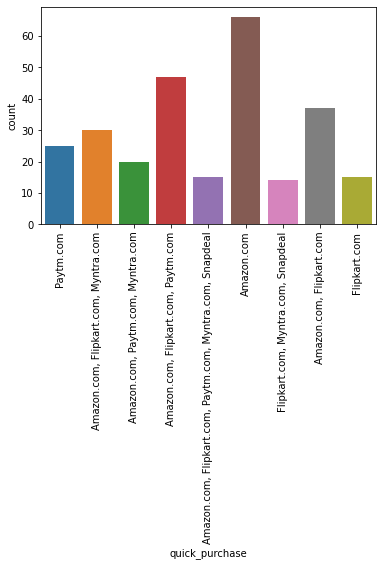

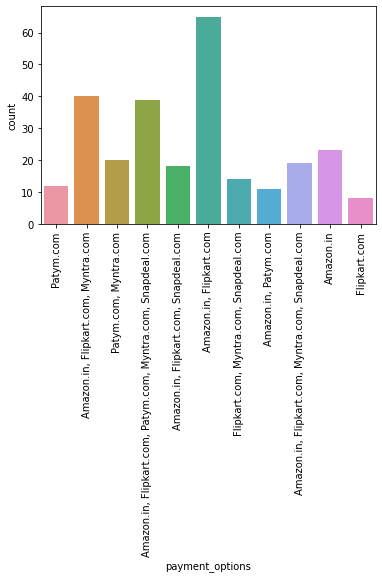

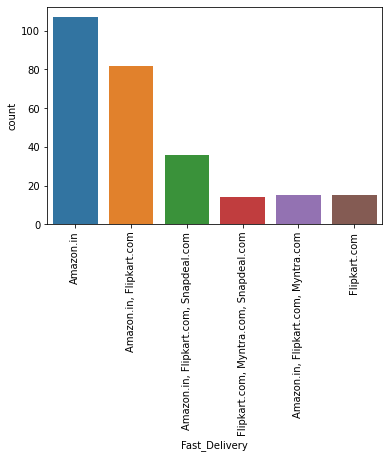

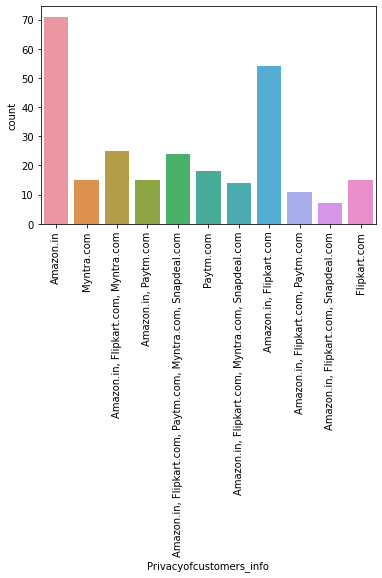

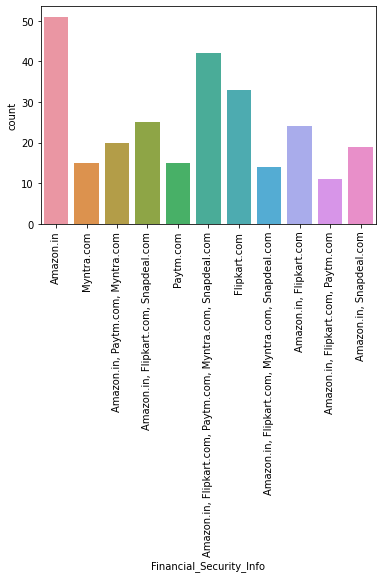

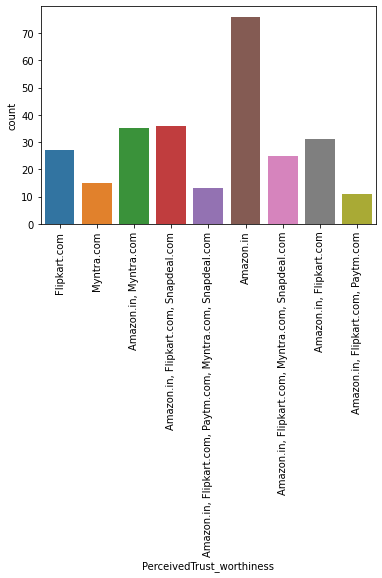

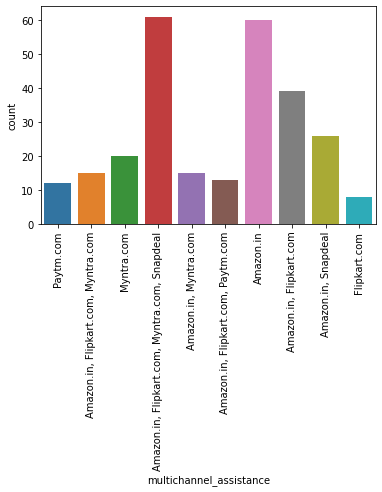

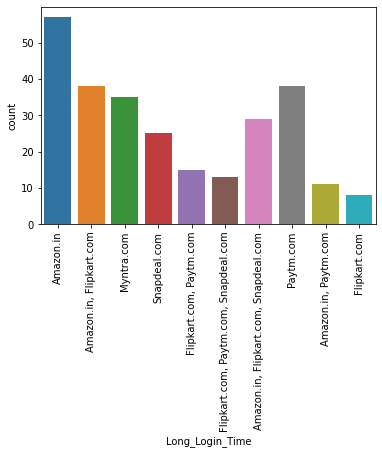

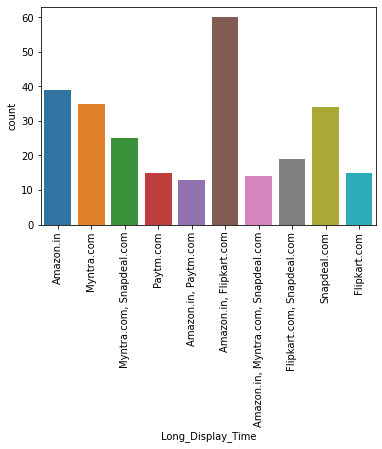

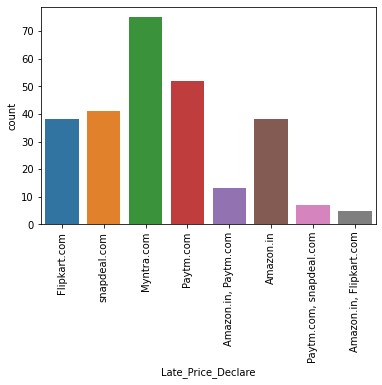

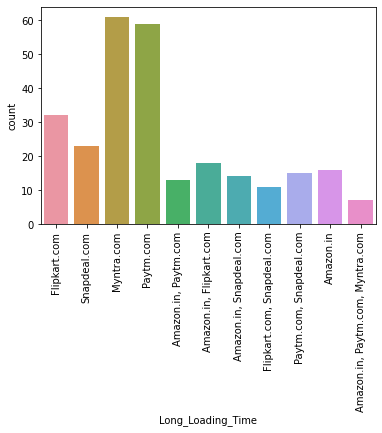

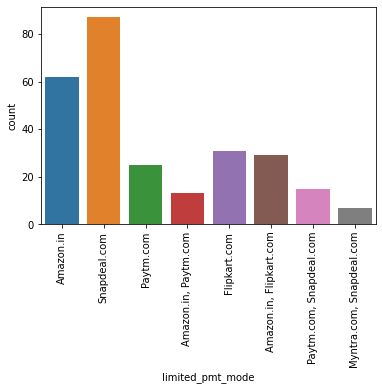

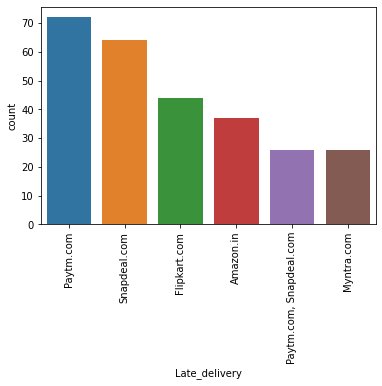

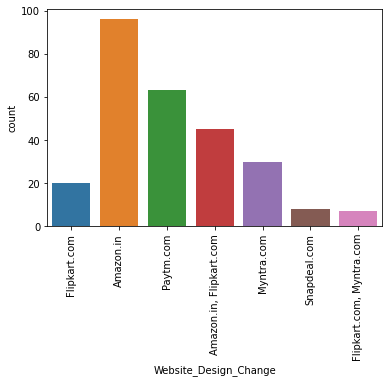

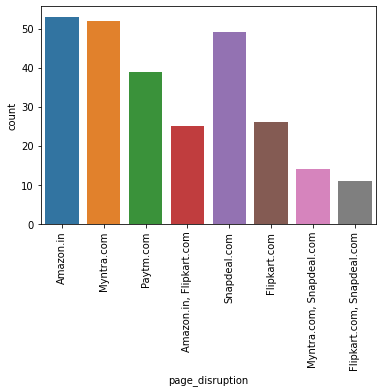

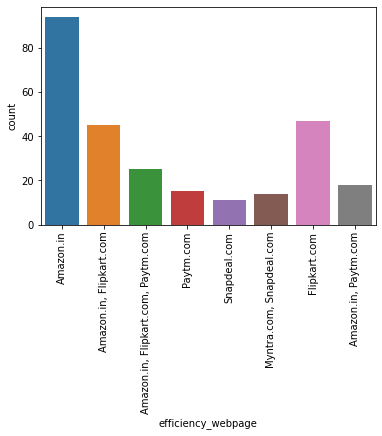

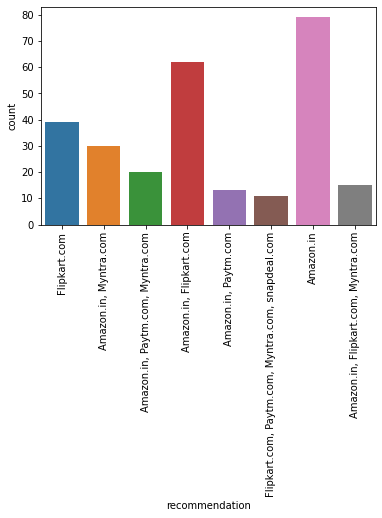

In [25]:
for i in df.columns:
    sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.show()


Observations from count plot:-
There are more Female customers than Male customers.
Most of the customers are in the age group between 21 to 40 years and the least customers are in the age group 51 years and above.
Most of the customers are from  Delhi and Delhi NCR, and the least customers are from the Bulandshahr city.
Most of the customers live in the place where the pincode is 201308.
Most customers have been shopping since above 4 years  and leaset number of customers are shopping since the past 1-2 years.
The shooping frequency of most customers are less than 10 times, and least number of customers have a shopping frequency of 21-30 times.
Most of the customers access the websites using Mobile Internet and least customers use Dial-up to access the internet.
Most customers use a Smartphone and least customers use Tablet.
Most customers use device with screen size  other than the screen sizes 4.7, 5.5, 5 inches and least customers have a screen size of 5 inches.
Most users have  Windows OS and least customers use iOS.
Most of the customers use Google Chrome as web browser and least customers use  Opera browser.
Most users use the Search engine to visit the website the first time.
Most users used the search engine to login followed by the application.
Most of the users have explored the website more than 15 times and least customers about 1 time.
Debit/Credit card is most used payment mode and least used payment mode is E-wallets.
Most customers use different platforms to shop as they got better alternative offers and very few customers lost trust in the application.
Reason for abandon for most of the customers is that they get better alternative offer and for very few customer,reason for abandon is no preffered mode of payment.
Most of the customers like Amazon interms of presence of online assistance through multi-channel followed by flipkart,Myntra and snapdeal.
The count is high for the customers who belive that Amazon keeps their financial information secure also the customers trusts flipkart, Myntra, Snapdeal and paytm in terms of keeping thier financial information secured.
Most cutomers Strongly agree that it is easy to navigate through the websites.
Most customers strongly agree that the website/application loads fast.
Most of the customer strongly agree that the website is user friendly, the mode of payment is convenient, and the delivery is done in a timely manner.
Most customers Strongly agree that the customer support response, customer privacy, and benifits are high.
Myntra and paytm  late declaration of price in promotion/sales period compared than others.
Myntra and paytm takes longer page loading time.
Most customers strongly agree that their replacement policy is good.
Most customers strongly agree that the information description is great.
Most customers Strongly agree/ agree that they trust the website.
Snapdeal.com has limited mode of payment on most products followed by Amazon.in.
Paytm and Snapdeal provides late delivery.
Most of the customers disliked change in website/Application design on amazon followed by paytm.
Most of the customers disliked frequent disruption when moving from one page to another on amazon, Myntra and snapdeal.
Most of the customers believes that Amazon and flipkart website is as efficient as before.
Most of the customers would like to recommend amazon retailer to a friend followed by flipkart.
Customers believes that Amazon and flipkart takes longer time in display the graphics and photos in sales period.
Myntra and paytm have late declaration of price in promotion/sales period compared to others.
Customers recommend more for Amazon.

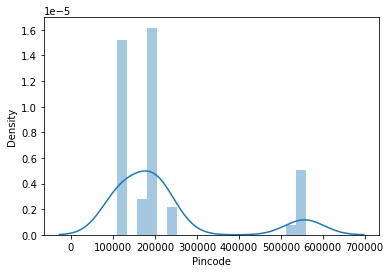

In [26]:
sns.distplot(df['Pincode'])
plt.show()


The data is not normally distributed in Pincode column.Data is rightly skewed.

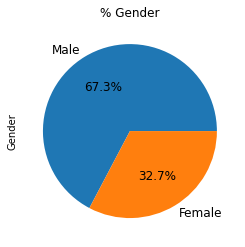

In [131]:
ax = (df['Gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()


Male percentage are more than female.

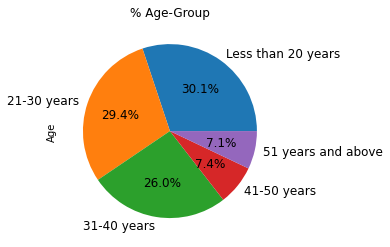

In [135]:
ax = (df['Age'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Less than 20 years','21-30 years','31-40 years','41-50 years', '51 years and above'], fontsize=12)                                                                           
ax.set_title('% Age-Group')
plt.show()


Percentage of less than 20 years is more.

# Bi-Variate Analysis

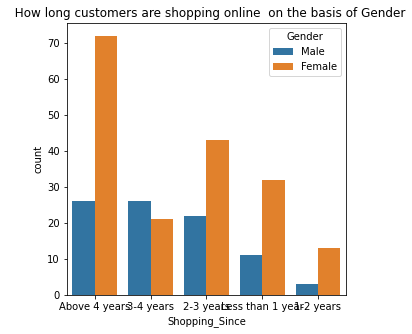

In [13]:
plt.figure(figsize=[5,5])
plt.title('  How long customers are shopping online  on the basis of Gender')
sns.countplot(df['Shopping_Since'], hue=df['Gender'])
plt.show()


Female customers shop online more than males, and shopping since 4 years and above.

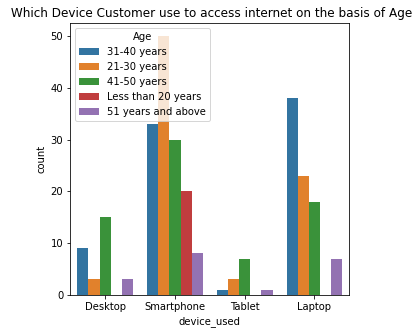

In [14]:
plt.figure(figsize=[5,5])
plt.title(' Which Device Customer use to access internet on the basis of Age')
sns.countplot(df['device_used'], hue=df['Age'])
plt.show()


21-30 Age group use Smartphone for shopping online followed by 31-40 age group.

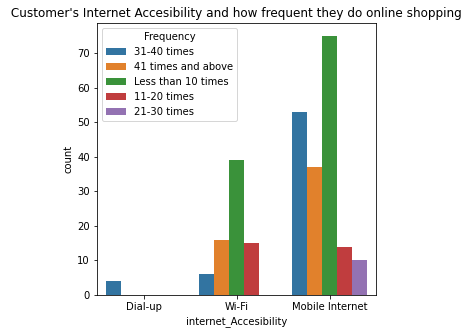

In [15]:
plt.figure(figsize=[5,5])
plt.title(" Customer's Internet Accesibility and how frequent they do online shopping ")
sns.countplot(df['internet_Accesibility'], hue=df['Frequency'])
plt.legend(loc='upper left',title='Frequency')
plt.show()


Most of the customers use Mobile Internet to do online shopping and frequecy of most of the customers is less than 10 times
in a year. 

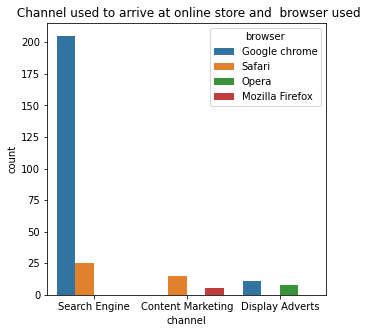

In [38]:
plt.figure(figsize=[5,5])
plt.title("   Channel used to arrive at online store and  browser used")
sns.countplot(df['channel'], hue=df['browser'])
plt.legend(loc='upper right',title='browser')
plt.show()


Most of the customers used Search Engine as Channel and browser used is Chrome.

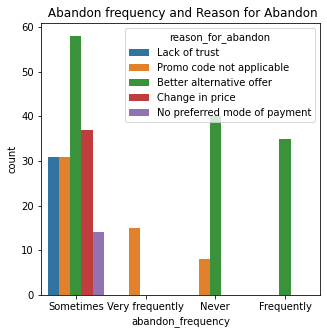

In [42]:
plt.figure(figsize=[5,5])
plt.title("  Customer's Abandon frequency and Reason for Abandon")
sns.countplot(df['abandon_frequency'], hue=df['reason_for_abandon'])
plt.legend(loc='upper right',title='reason_for_abandon')
plt.show()


Reason for abandon for most of the customers is better alternative offer.

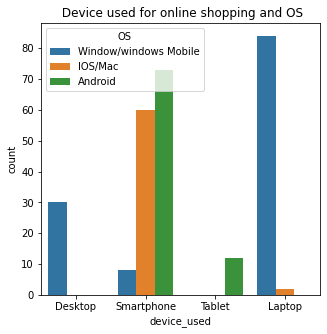

In [16]:
plt.figure(figsize=[5,5])
plt.title(" Device used for online shopping and OS")
sns.countplot(df['device_used'], hue=df['OS'])
plt.legend(loc='upper left',title='OS')
plt.show()


Most of the customers use windows as OS with device laptop.

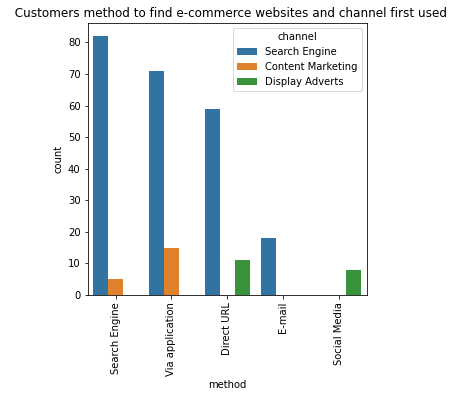

In [18]:
plt.figure(figsize=[5,5])
plt.title("  Customers method to find e-commerce websites and channel first used")
sns.countplot(df['method'], hue=df['channel'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='channel')
plt.show()


Search Engion is the method  and Search Engine is the channel first used to arrive at the online retail store.

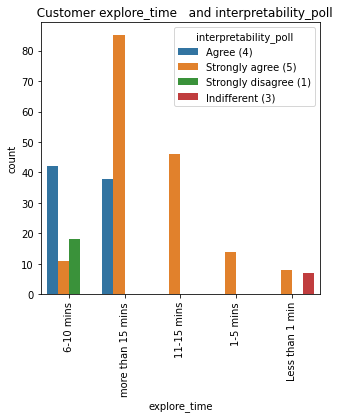

In [19]:
plt.figure(figsize=[5,5])
plt.title("  Customer explore_time   and interpretability_poll")
sns.countplot(df['explore_time'], hue=df['interpretability_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='interpretability_poll')
plt.show()


Most of the customers explore more than 15 minutes to make a decision and agree that contents on the retailer website is 
easy to understand.

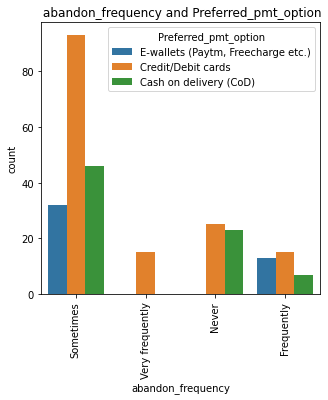

In [49]:
plt.figure(figsize=[5,5])
plt.title(" abandon_frequency and Preferred_pmt_option")
sns.countplot(df['abandon_frequency'], hue=df['Preferred_pmt_option'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Preferred_pmt_option')
plt.show()


Most of the customers abandon when they are paying through Credit debit cards.

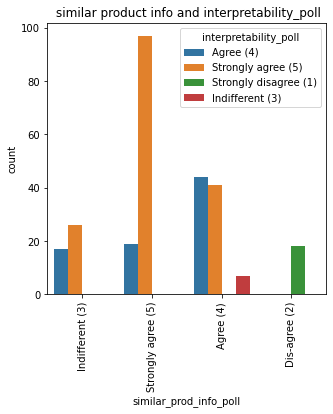

In [82]:
plt.figure(figsize=[5,5])
plt.title(" similar product info and interpretability_poll")
sns.countplot(df['similar_prod_info_poll'], hue=df['interpretability_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='interpretability_poll')
plt.show()


Customers strongly  agree that contents on websites are easy to understand and Information on similar product to the one highlighted  is important 
for product comparison.

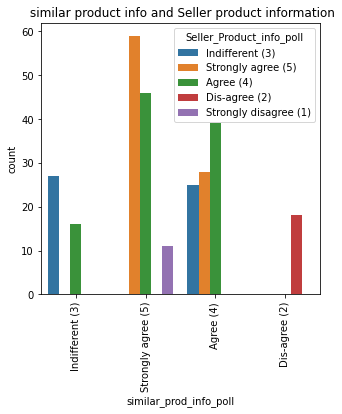

In [83]:
plt.figure(figsize=[5,5])
plt.title(" similar product info and Seller product information")
sns.countplot(df['similar_prod_info_poll'], hue=df['Seller_Product_info_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Seller_Product_info_poll')
plt.show()


Customers strongly agree that  Complete information on listed seller and product being offered is important for purchase 
decision.

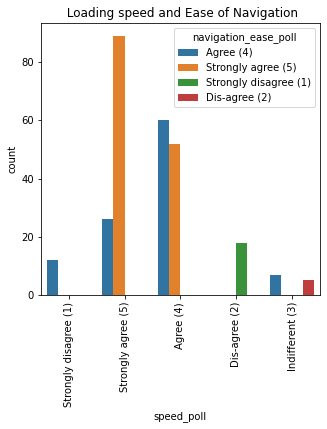

In [84]:
plt.figure(figsize=[5,5])
plt.title(" Loading speed and Ease of Navigation")
sns.countplot(df['speed_poll'], hue=df['navigation_ease_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='navigation_ease_poll')
plt.show()


 Most of the Customers strongly agree that e-commerce websites loading and processing speed and ease in navigation are good.

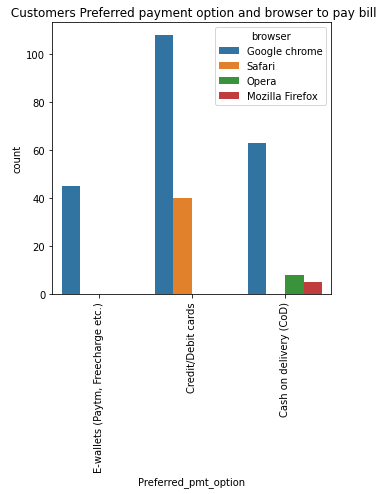

In [20]:
plt.figure(figsize=[5,5])
plt.title(" Customers Preferred payment option and browser to pay bill")
sns.countplot(df['Preferred_pmt_option'], hue=df['browser'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='browser')
plt.show()


 More Customers use Google chrome browser and  prefer Credit/Debit card to do payment.

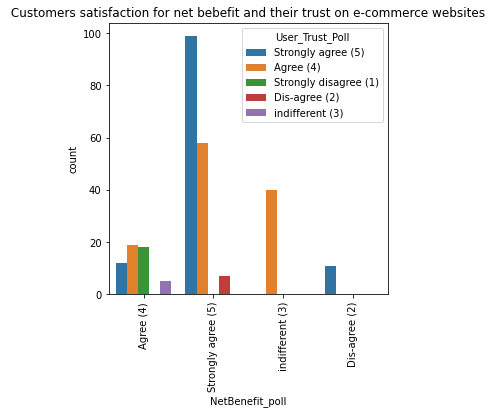

In [22]:
plt.figure(figsize=[5,5])
plt.title(" Customers satisfaction for net bebefit and their trust on e-commerce websites ")
sns.countplot(df['NetBenefit_poll'], hue=df['User_Trust_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='User_Trust_Poll')
plt.show()


Customer strongly agree that net benefit derived from online shopping increases their trust in doing online shopping.

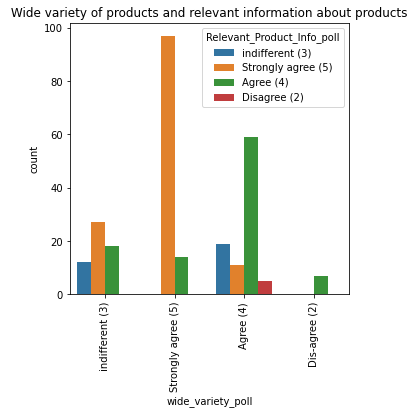

In [24]:
plt.figure(figsize=[5,5])
plt.title(" Wide variety of products and relevant information about products ")
sns.countplot(df['wide_variety_poll'], hue=df['Relevant_Product_Info_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Relevant_Product_Info_poll')
plt.show()


Customers Strongly agree that wide variety of products and relevant information about products increases their interest in 
online shopping.

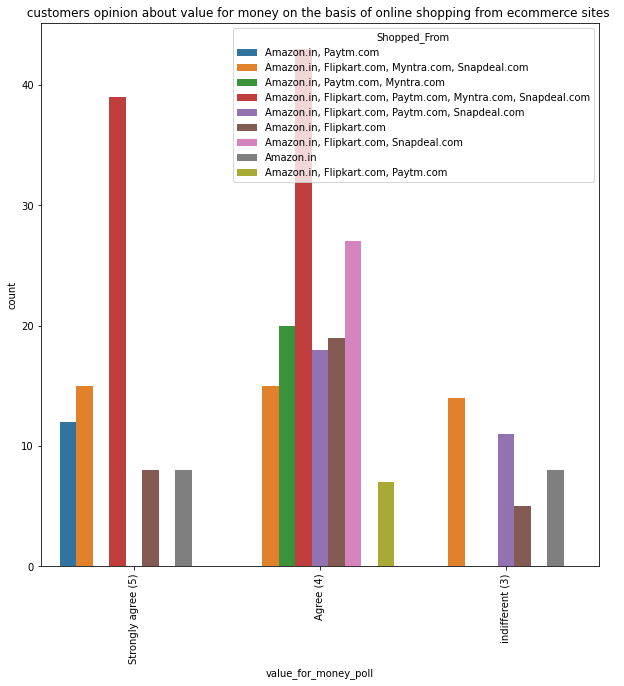

In [27]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about value for money on the basis of online shopping from ecommerce sites  ")
sns.countplot(df['value_for_money_poll'], hue=df['Shopped_From'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Shopped_From')
plt.show()


More of the customers agree that online shopping from Amazon,Flipkart,Paytm,Myntra and snapdeal offer products which gives 
value for money.

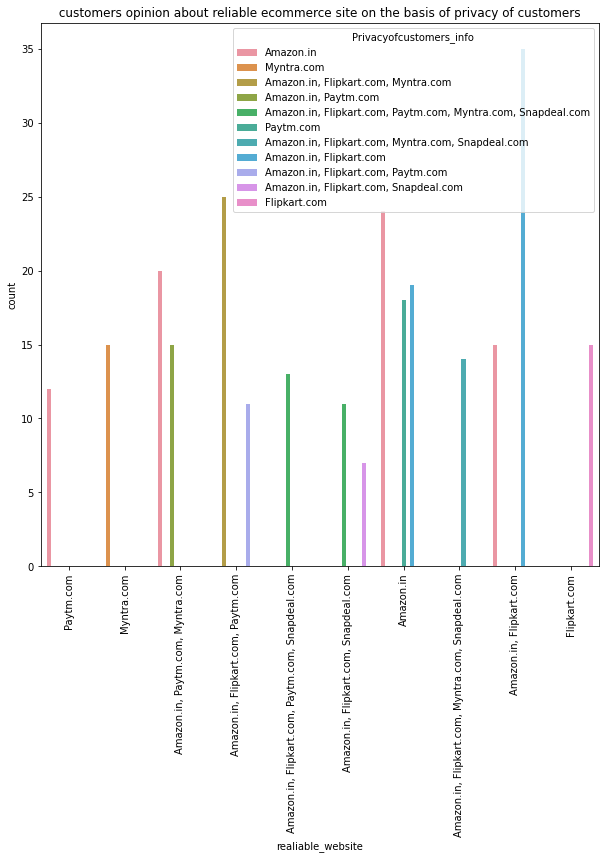

In [29]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about reliable ecommerce site on the basis of privacy of customers ")
sns.countplot(df['realiable_website'], hue=df['Privacyofcustomers_info'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Privacyofcustomers_info')
plt.show()


Most customers beleive that Amazon and FlipKart are reliable websites,they provide good customer privacy.

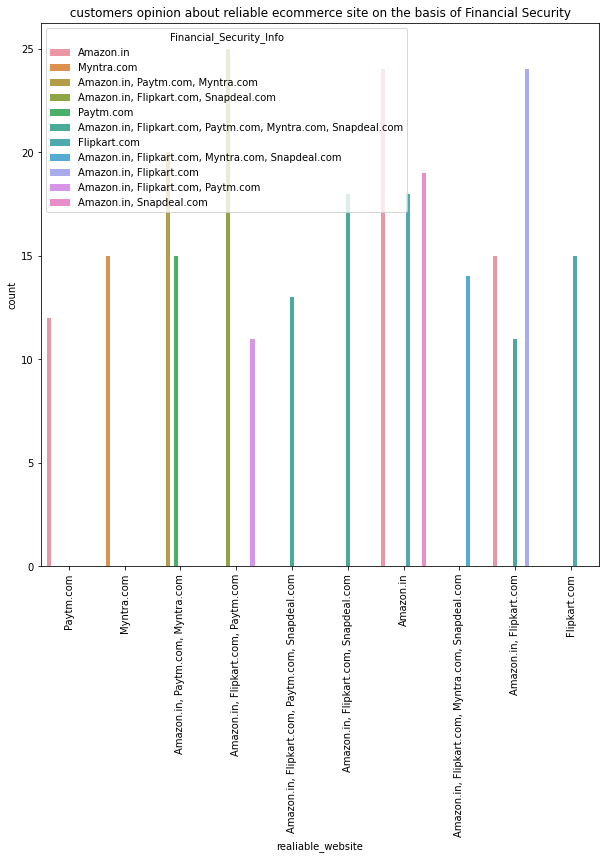

In [31]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about reliable ecommerce site on the basis of Financial Security ")
sns.countplot(df['realiable_website'], hue=df['Financial_Security_Info'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='Financial_Security_Info')
plt.show()


Most customers believe that Amazon,paytm and snapdeal provides good financial security.

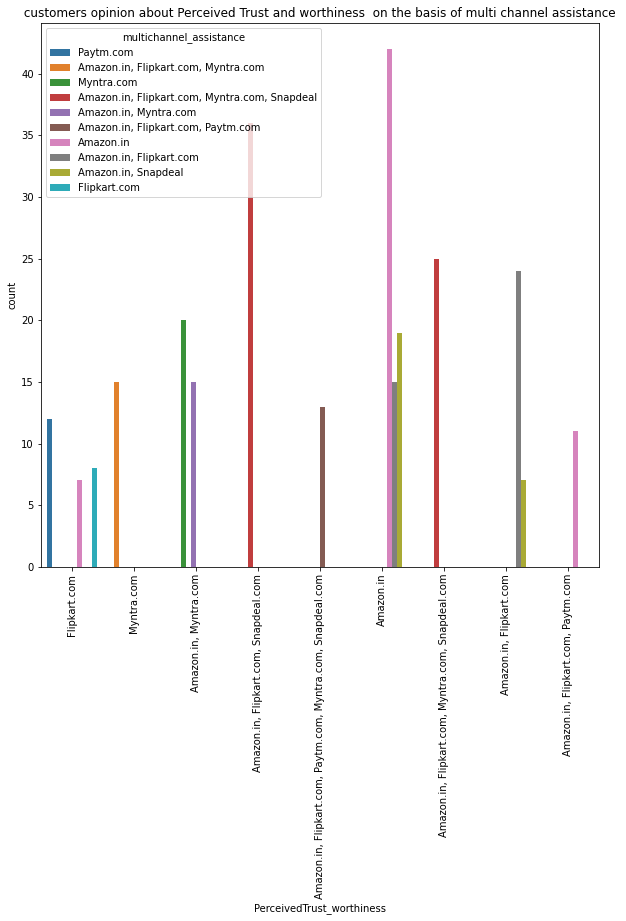

In [32]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about Perceived Trust and worthiness  on the basis of multi channel assistance ")
sns.countplot(df['PerceivedTrust_worthiness'], hue=df['multichannel_assistance'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='multichannel_assistance')
plt.show()


Amazon has received most of the customers trust by providing multichannel assistance.

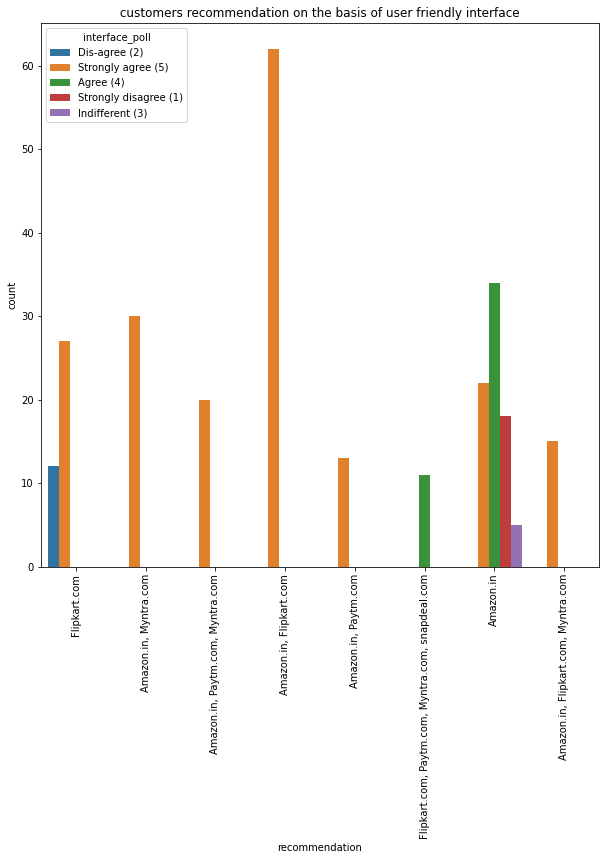

In [33]:
plt.figure(figsize=[10,10])
plt.title(" customers recommendation on the basis of user friendly interface ")
sns.countplot(df['recommendation'], hue=df['interface_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='interface_poll')
plt.show()


  Most Customers recommend Amazon and Flipkart on basis User Friendly interface.

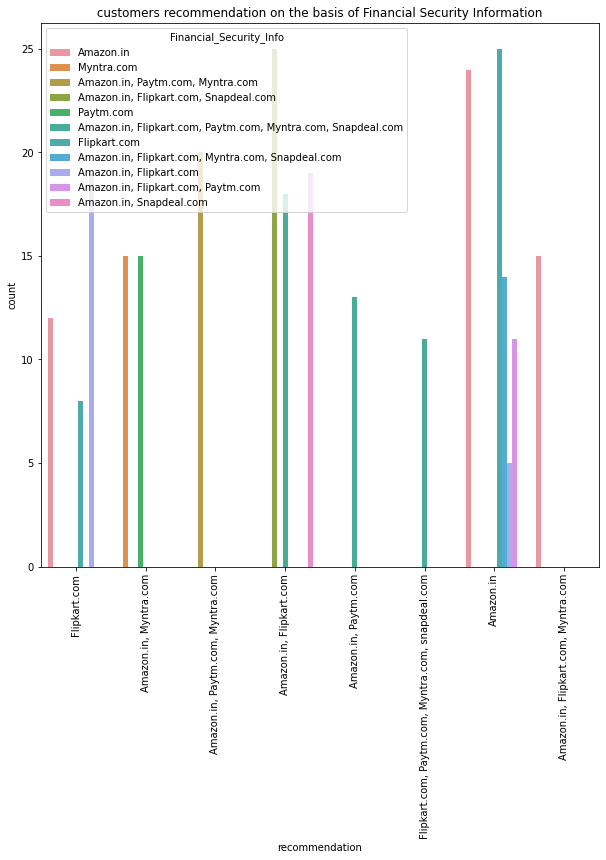

In [34]:
plt.figure(figsize=[10,10])
plt.title(" customers recommendation on the basis of Financial Security Information ")
sns.countplot(df['recommendation'], hue=df['Financial_Security_Info'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='Financial_Security_Info')
plt.show()


Most Customers recommend Amazon and Flipkart on basis Financial Security information.

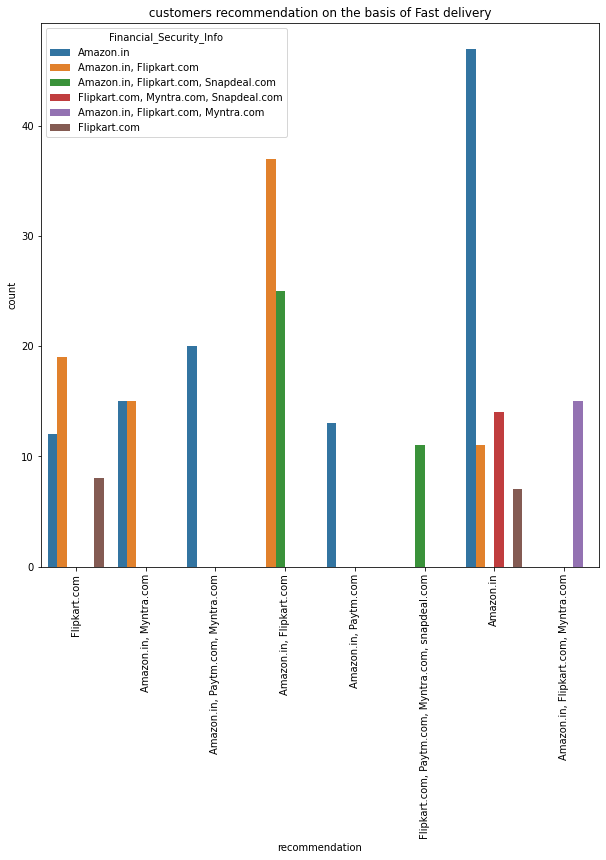

In [35]:
plt.figure(figsize=[10,10])
plt.title(" customers recommendation on the basis of Fast delivery ")
sns.countplot(df['recommendation'], hue=df['Fast_Delivery'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='Financial_Security_Info')
plt.show()


Most Customers recommend Amazon on basis of Fast delivery.

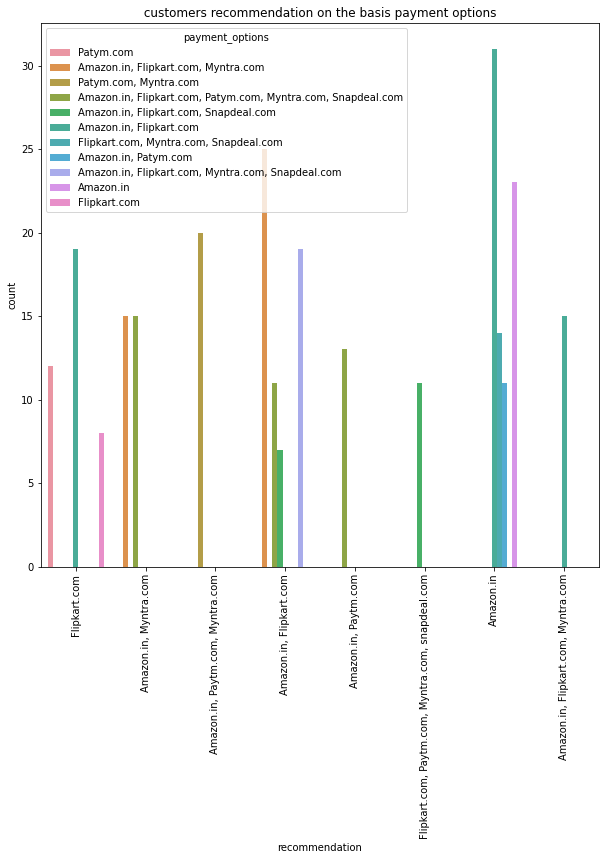

In [36]:
plt.figure(figsize=[10,10])
plt.title(" customers recommendation on the basis payment options ")
sns.countplot(df['recommendation'], hue=df['payment_options'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='payment_options')
plt.show()


Most Customers recommend Amazon on basis of payment options.

# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

lec = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=lec.fit_transform(df[i])


In [57]:
df.head()

Gender  Age  City  Pincode  Shopping_Since  Frequency  \
0       1    1     2   110009               3          2   
1       0    0     2   110030               3          3   
2       0    0     4   201308               2          3   
3       1    0     6   132001               2          4   
4       0    0     0   530068               1          0   

   internet_Accesibility  device_used  Screen_Size  OS  browser  channel  \
0                      0            0            3   2        0        2   
1                      2            2            0   1        0        2   
2                      1            2            2   0        0        2   
3                      1            2            2   1        3        2   
4                      2            2            0   1        3        0   

   method  explore_time  Preferred_pmt_option  abandon_frequency  \
0       2             2                     2                  2   
1       4             4                     1                  3   
2       4             1                     2                  2   
3       2             2                     1                  1   
4       4             4                     1                  0   

   reason_for_abandon  interpretability_poll  similar_prod_info_poll  \
0                   2                      0                       2   
1                   4                      2                       3   
2                   4                      2                       0   
3                   0                      0                       0   
4                   0                      2                       2   

   Seller_Product_info_poll  product_information_poll  navigation_ease_poll  \
0                         2                         0                     0   
1                         3                         2                     2   
2                         0                         0                     0   
3                         2                         0                     2   
4                         2                         0                     0   

   speed_poll  interface_poll  Paymentmethods_poll  \
0           4               1                    1   
1           3               3                    2   
2           0               3                    2   
3           0               3                    2   
4           3               3                    2   

   timely_fullfill_trust_poll  Response_poll  Customer_Privacy_poll  \
0                           1              1                      0   
1                           2              1                      1   
2                           2              1                      1   
3                           0              1                      1   
4                           0              1                      0   

   Responsivness_poll  benefits_poll  Enjoyment_poll  Convenience_poll  \
0                   0              4               3                 1   
1                   1              2               2                 2   
2                   1              2               2                 2   
3                   0              0               4                 3   
4                   1              2               2                 2   

   Repalcement_policy_poll  Loyality_programs_poll  Quality_inf_poll  \
0                        1                       0                 2   
1                        2                       2                 1   
2                        2                       2                 1   
3                        0                       4                 2   
4                        2                       1                 0   

   Satisfaction_poll  NetBenefit_poll  User_Trust_poll  wide_variety_poll  \
0                  2                0                2                  3   
1                  2                2                2                  2   
2      

All of the columns are now in numerical format.

# Outliers

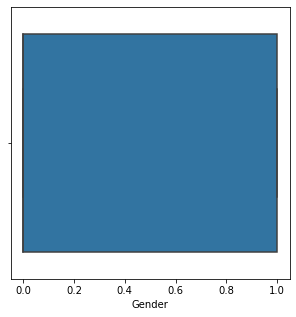

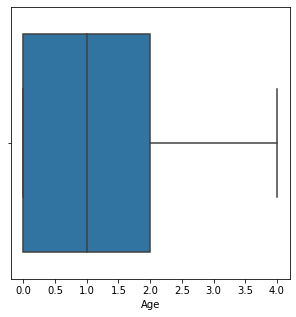

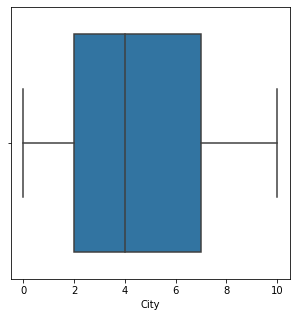

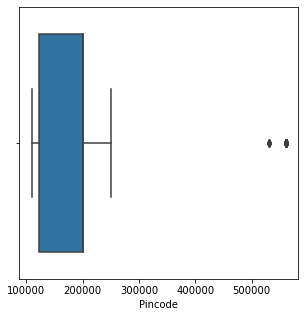

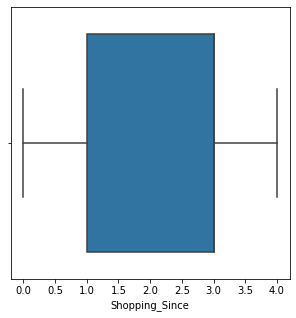

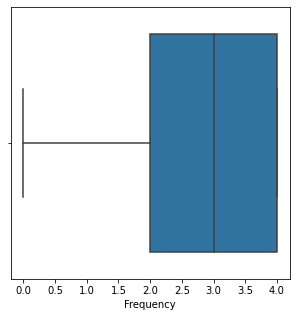

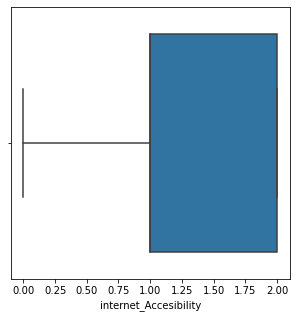

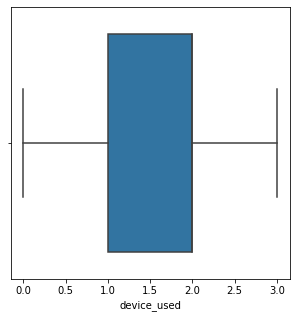

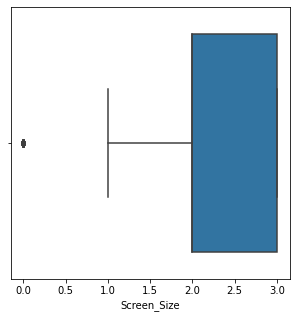

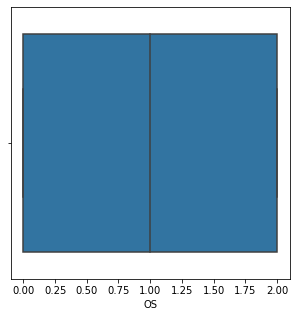

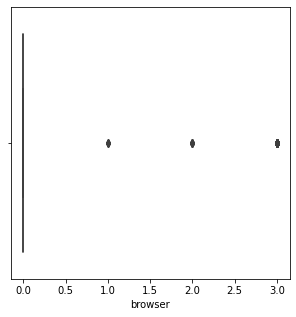

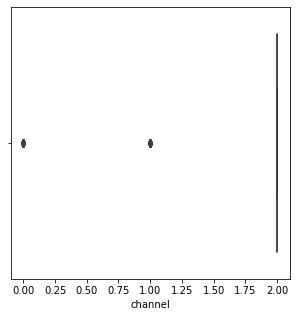

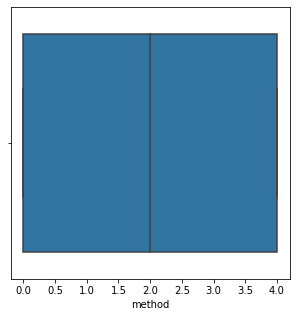

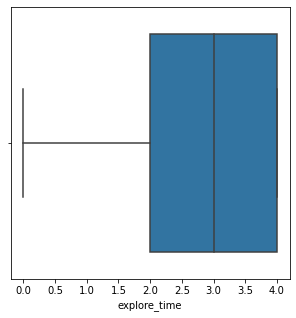

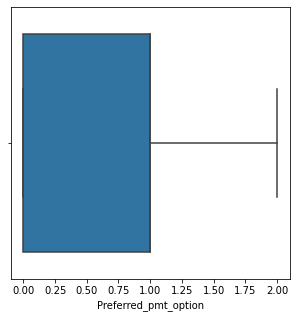

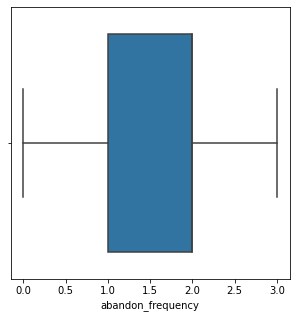

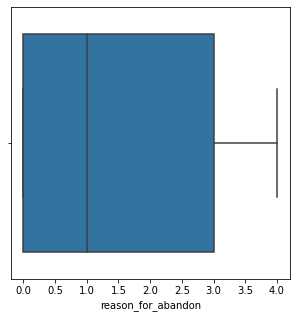

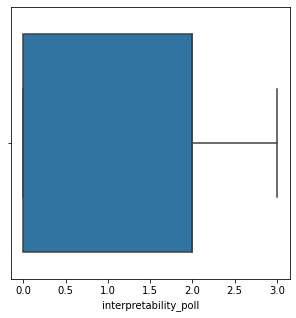

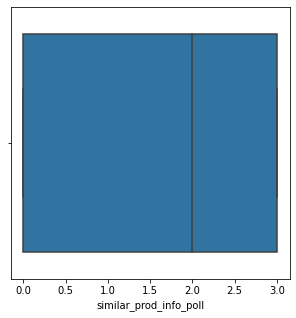

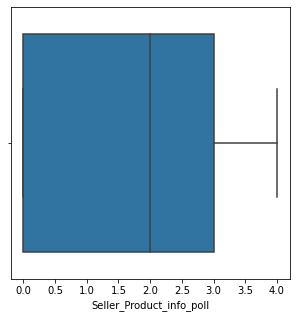

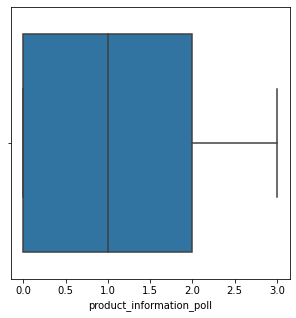

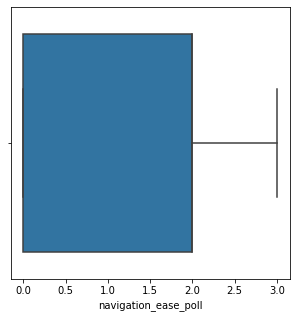

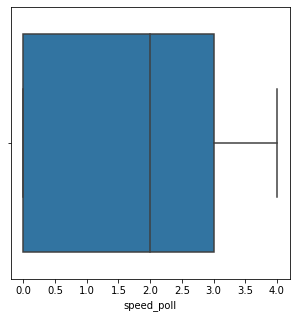

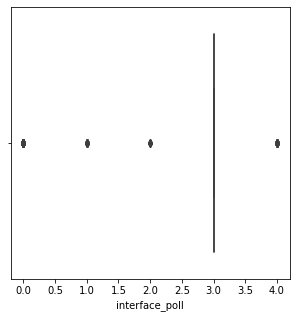

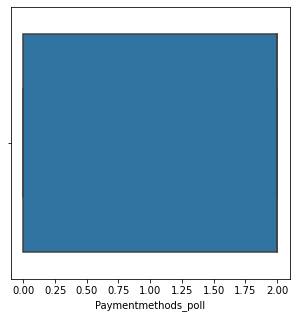

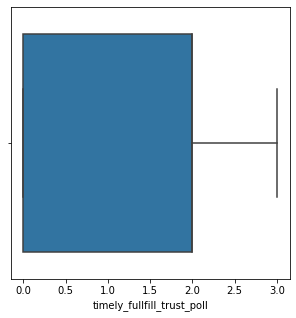

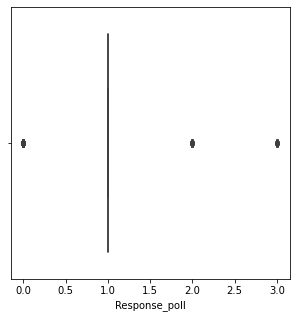

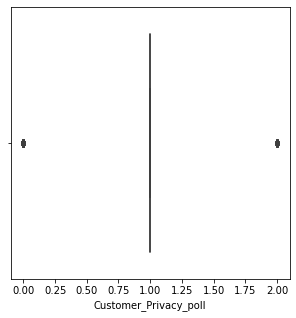

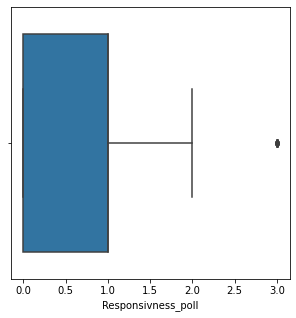

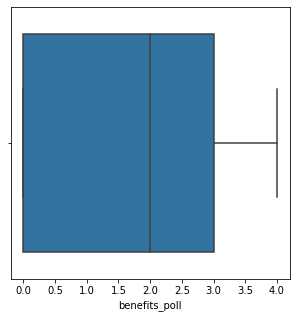

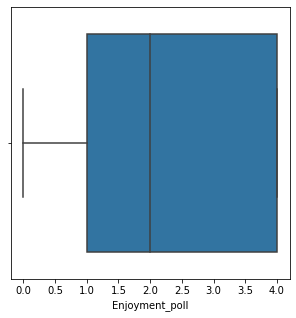

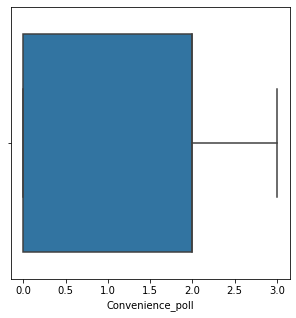

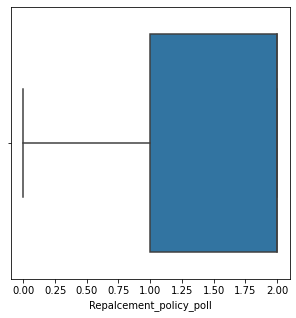

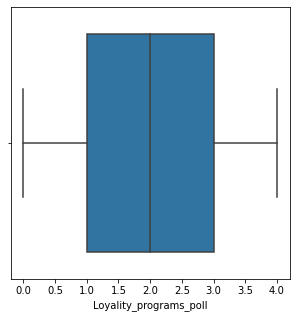

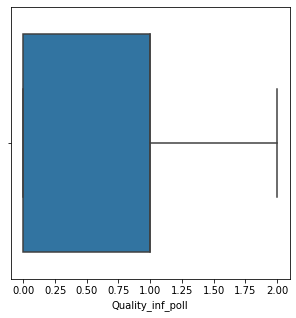

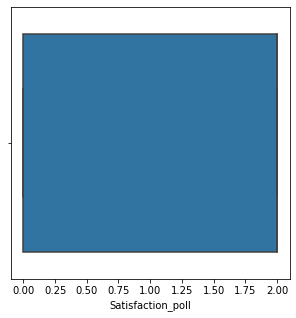

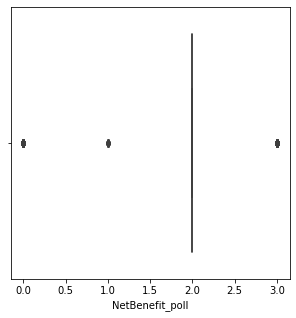

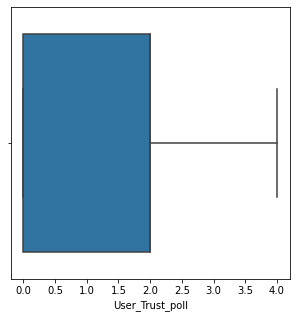

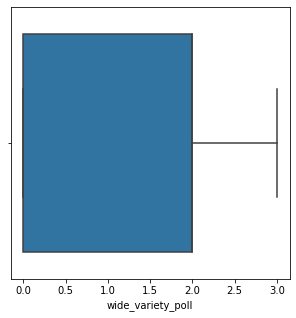

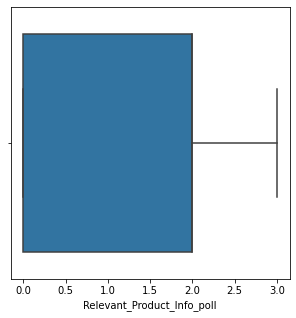

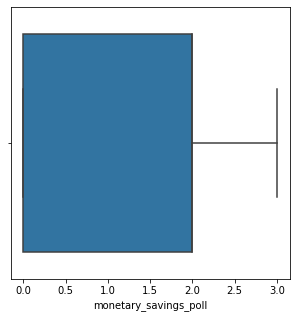

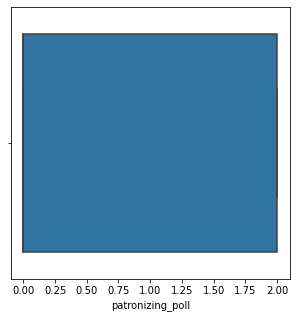

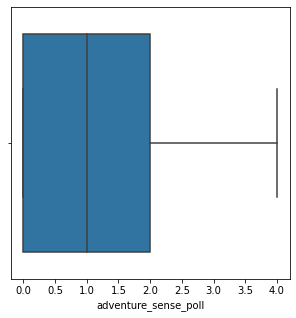

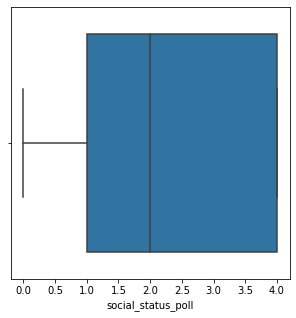

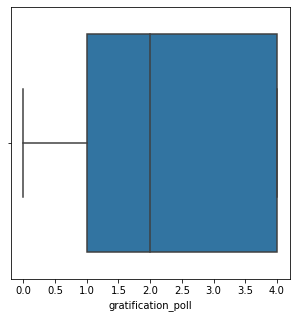

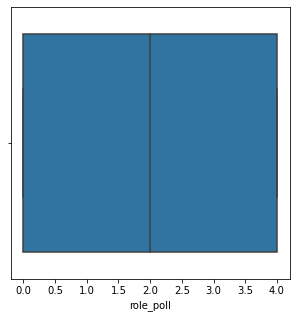

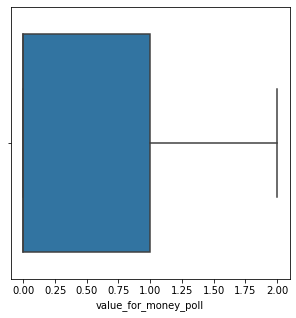

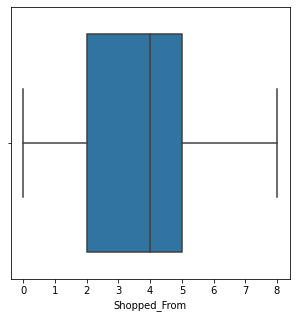

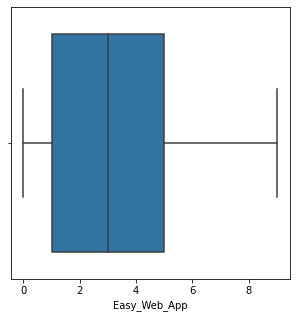

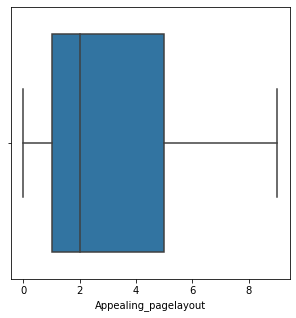

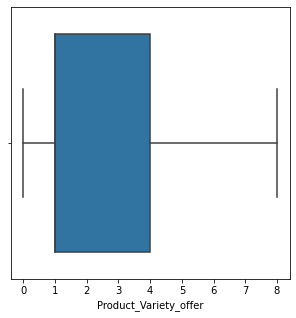

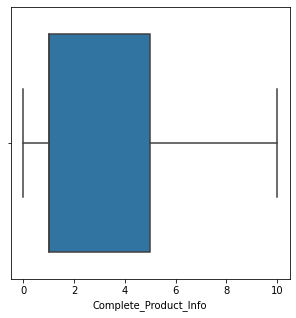

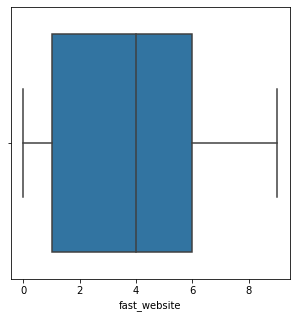

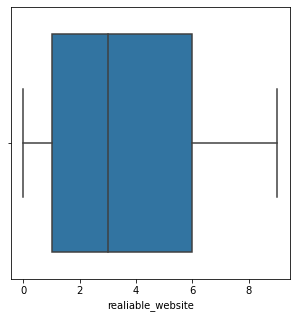

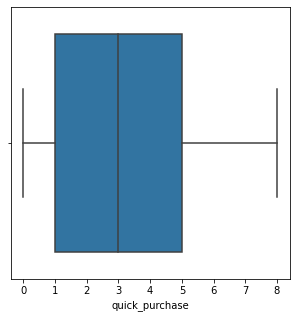

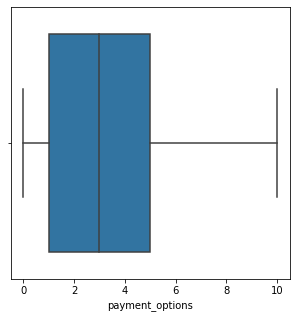

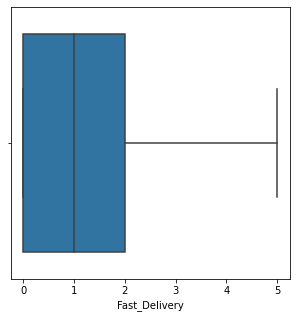

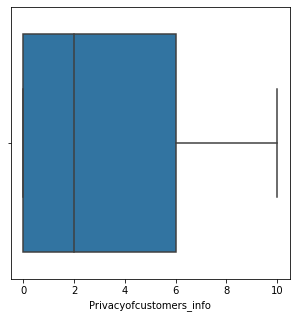

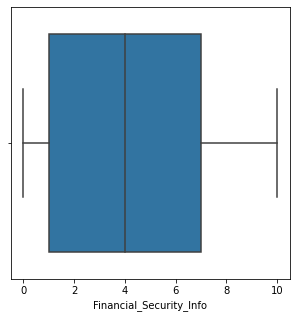

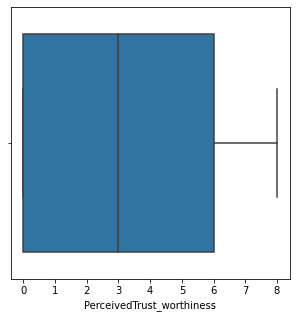

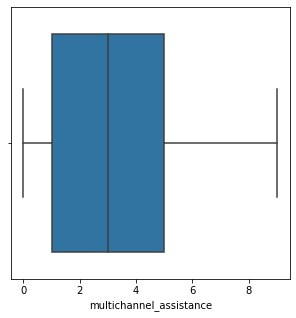

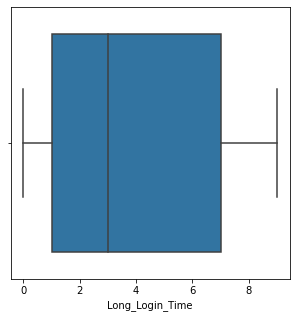

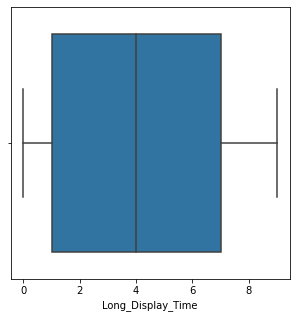

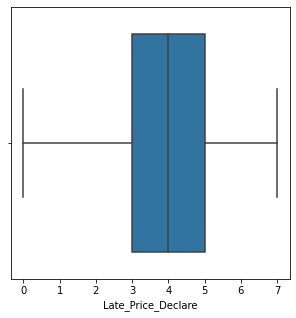

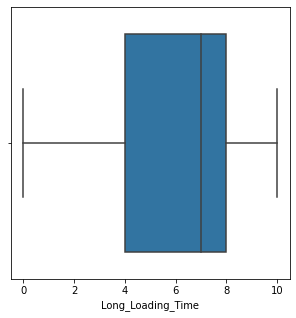

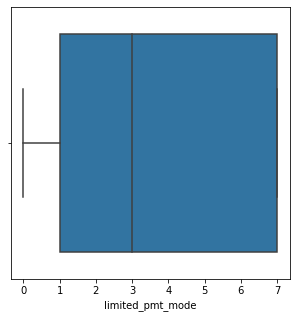

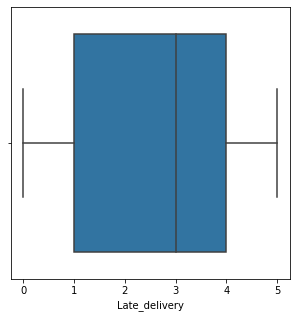

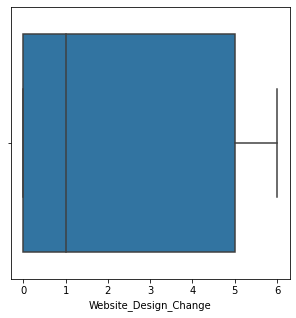

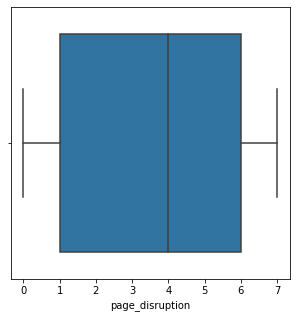

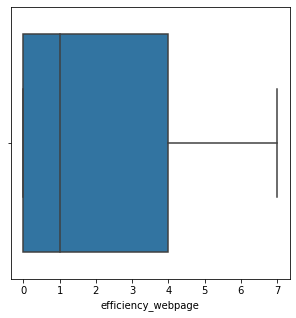

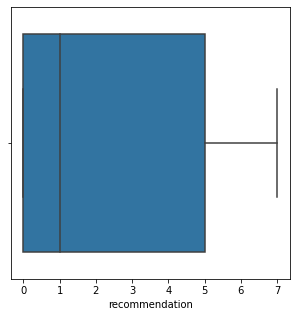

In [58]:
for i in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.show()


##Following columns have outliers:
Pincode
Screen_Size
browser
channel
interface_poll
Respose_poll
Customer_Privacy_Poll
Responsivness_poll
NetBenefit_poll
We do not need to remove the outliers from the above columns as they are all categorical columns.

# Skewness

In [59]:
df.skew()

Gender                        0.741028
Age                           0.680987
City                          0.313729
Pincode                       1.748322
Shopping_Since               -0.276968
Frequency                    -0.848896
internet_Accesibility         0.630053
device_used                  -0.485180
Screen_Size                  -1.308503
OS                           -0.270283
browser                       1.710244
channel                      -2.469485
method                       -0.041161
explore_time                 -0.390691
Preferred_pmt_option          0.129735
abandon_frequency            -0.867449
reason_for_abandon            0.743052
interpretability_poll        -0.570717
similar_prod_info_poll       -0.277821
Seller_Product_info_poll     -0.006110
product_information_poll      0.243767
navigation_ease_poll         -0.207732
speed_poll                   -0.012294
interface_poll               -1.270908
Paymentmethods_poll          -0.613621
timely_fullfill_trust_pol

Except Pincode all other columns are Categorical,So no need to remove skewness.

# Correlation

In [60]:
df.corr()

Gender       Age      City   Pincode  \
Gender                      1.000000  0.046169  0.080912 -0.260365   
Age                         0.046169  1.000000  0.113712 -0.120704   
City                        0.080912  0.113712  1.000000 -0.416597   
Pincode                    -0.260365 -0.120704 -0.416597  1.000000   
Shopping_Since             -0.057096 -0.087847 -0.138329 -0.090049   
Frequency                   0.062103  0.278446  0.170985 -0.287645   
internet_Accesibility      -0.342762  0.206453  0.057544 -0.101272   
device_used                 0.061673  0.022383  0.020650 -0.004980   
Screen_Size                 0.028794 -0.006101  0.199296 -0.211198   
OS                         -0.019243 -0.048087 -0.051642 -0.053901   
browser                     0.071385 -0.231530 -0.051933  0.089281   
channel                    -0.079834  0.186455  0.147015 -0.264197   
method                     -0.189867 -0.091771 -0.238503  0.195495   
explore_time               -0.042602 -0.218962 -0.232425  0.117338   
Preferred_pmt_option        0.073649 -0.079731 -0.006495  0.031185   
abandon_frequency           0.149324  0.068907 -0.027082 -0.132583   
reason_for_abandon          0.090947  0.172284  0.018034 -0.139742   
interpretability_poll      -0.266768  0.182499 -0.053618  0.211828   
similar_prod_info_poll     -0.213973 -0.202649 -0.224746  0.144098   
Seller_Product_info_poll   -0.182851  0.210166 -0.057961 -0.001938   
product_information_poll   -0.078158  0.065476 -0.184248  0.083464   
navigation_ease_poll       -0.147025 -0.118890 -0.313320  0.065398   
speed_poll                 -0.065858 -0.110344 -0.175263  0.122205   
interface_poll             -0.288620 -0.009573 -0.258610  0.062155   
Paymentmethods_poll        -0.272860  0.125973 -0.077041  0.104302   
timely_fullfill_trust_poll -0.113377  0.214178 -0.018186 -0.015739   
Response_poll              -0.201347  0.146179 -0.096207  0.167859   
Customer_Privacy_poll      -0.138322  0.112868 -0.045319  0.077224   
Responsivness_poll         -0.341420  0.027126 -0.118372 -0.013223   
benefits_poll              -0.024235 -0.044179  0.017214  0.038526   
...                              ...       ...       ...       ...   
patronizing_poll            0.182842 -0.017528 -0.024103  0.003779   
adventure_sense_poll       -0.050610  0.028055 -0.323833  0.192415   
social_status_poll         -0.035803  0.154534 -0.183915  0.179581   
gratification_poll         -0.207587  0.176895  0.003242  0.036294   
role_poll                  -0.050009 -0.231648 -0.258435  0.037902   
value_for_money_poll        0.123718  0.046574  0.198166  0.109155   
Shopped_From                0.091958 -0.015102  0.120865 -0.020076   
Easy_Web_App                0.083668 -0.013076  0.084923 -0.072228   
Appealing_pagelayout        0.022497 -0.035915 -0.015011  0.015560   
Product_Variety_offer      -0.011826  0.094365 -0.090765  0.141687   
Complete_Product_Info       0.122465  0.039247  0.053202  0.010051   
fast_website                0.201207 -0.032014  0.129769 -0.102335   
realiable_website           0.116682  0.069200 -0.076753  0.041604   
quick_purchase              0.044936  0.159527  0.193116  0.024672   
payment_options             0.049906  0.093679  0.232500 -0.046428   
Fast_Delivery               0.092808  0.225718  0.190750 -0.172836   
Privacyofcustomers_info     0.061534  0.164993 -0.250461  0.253394   
Financial_Security_Info    -0.014849 -0.023898 -0.262662  0.212137   
PerceivedTrust_worthiness   0.158901 -0.000214 -0.089781  0.053169   
multichannel_assistance    -0.068618 -0.084202  0.019085 -0.037382   
Long_Login_Time            -0.101925 -0.281877 -0.065450 -0.085194   
Long_Display_Time          -0.228744 -0.095850 -0.115453  0.089605   
Late_Price_Declare         -0.061374 -0.064601 -0.293441 -0.070046   
Long_Loading_Time           0.008289 -0.128064 -0.104340 -0.026817   
limited_pmt_mode           -0.158941 -0.198658 -0.263921  0.054532   
Late_delivery               0.060838 -0.

<AxesSubplot:>

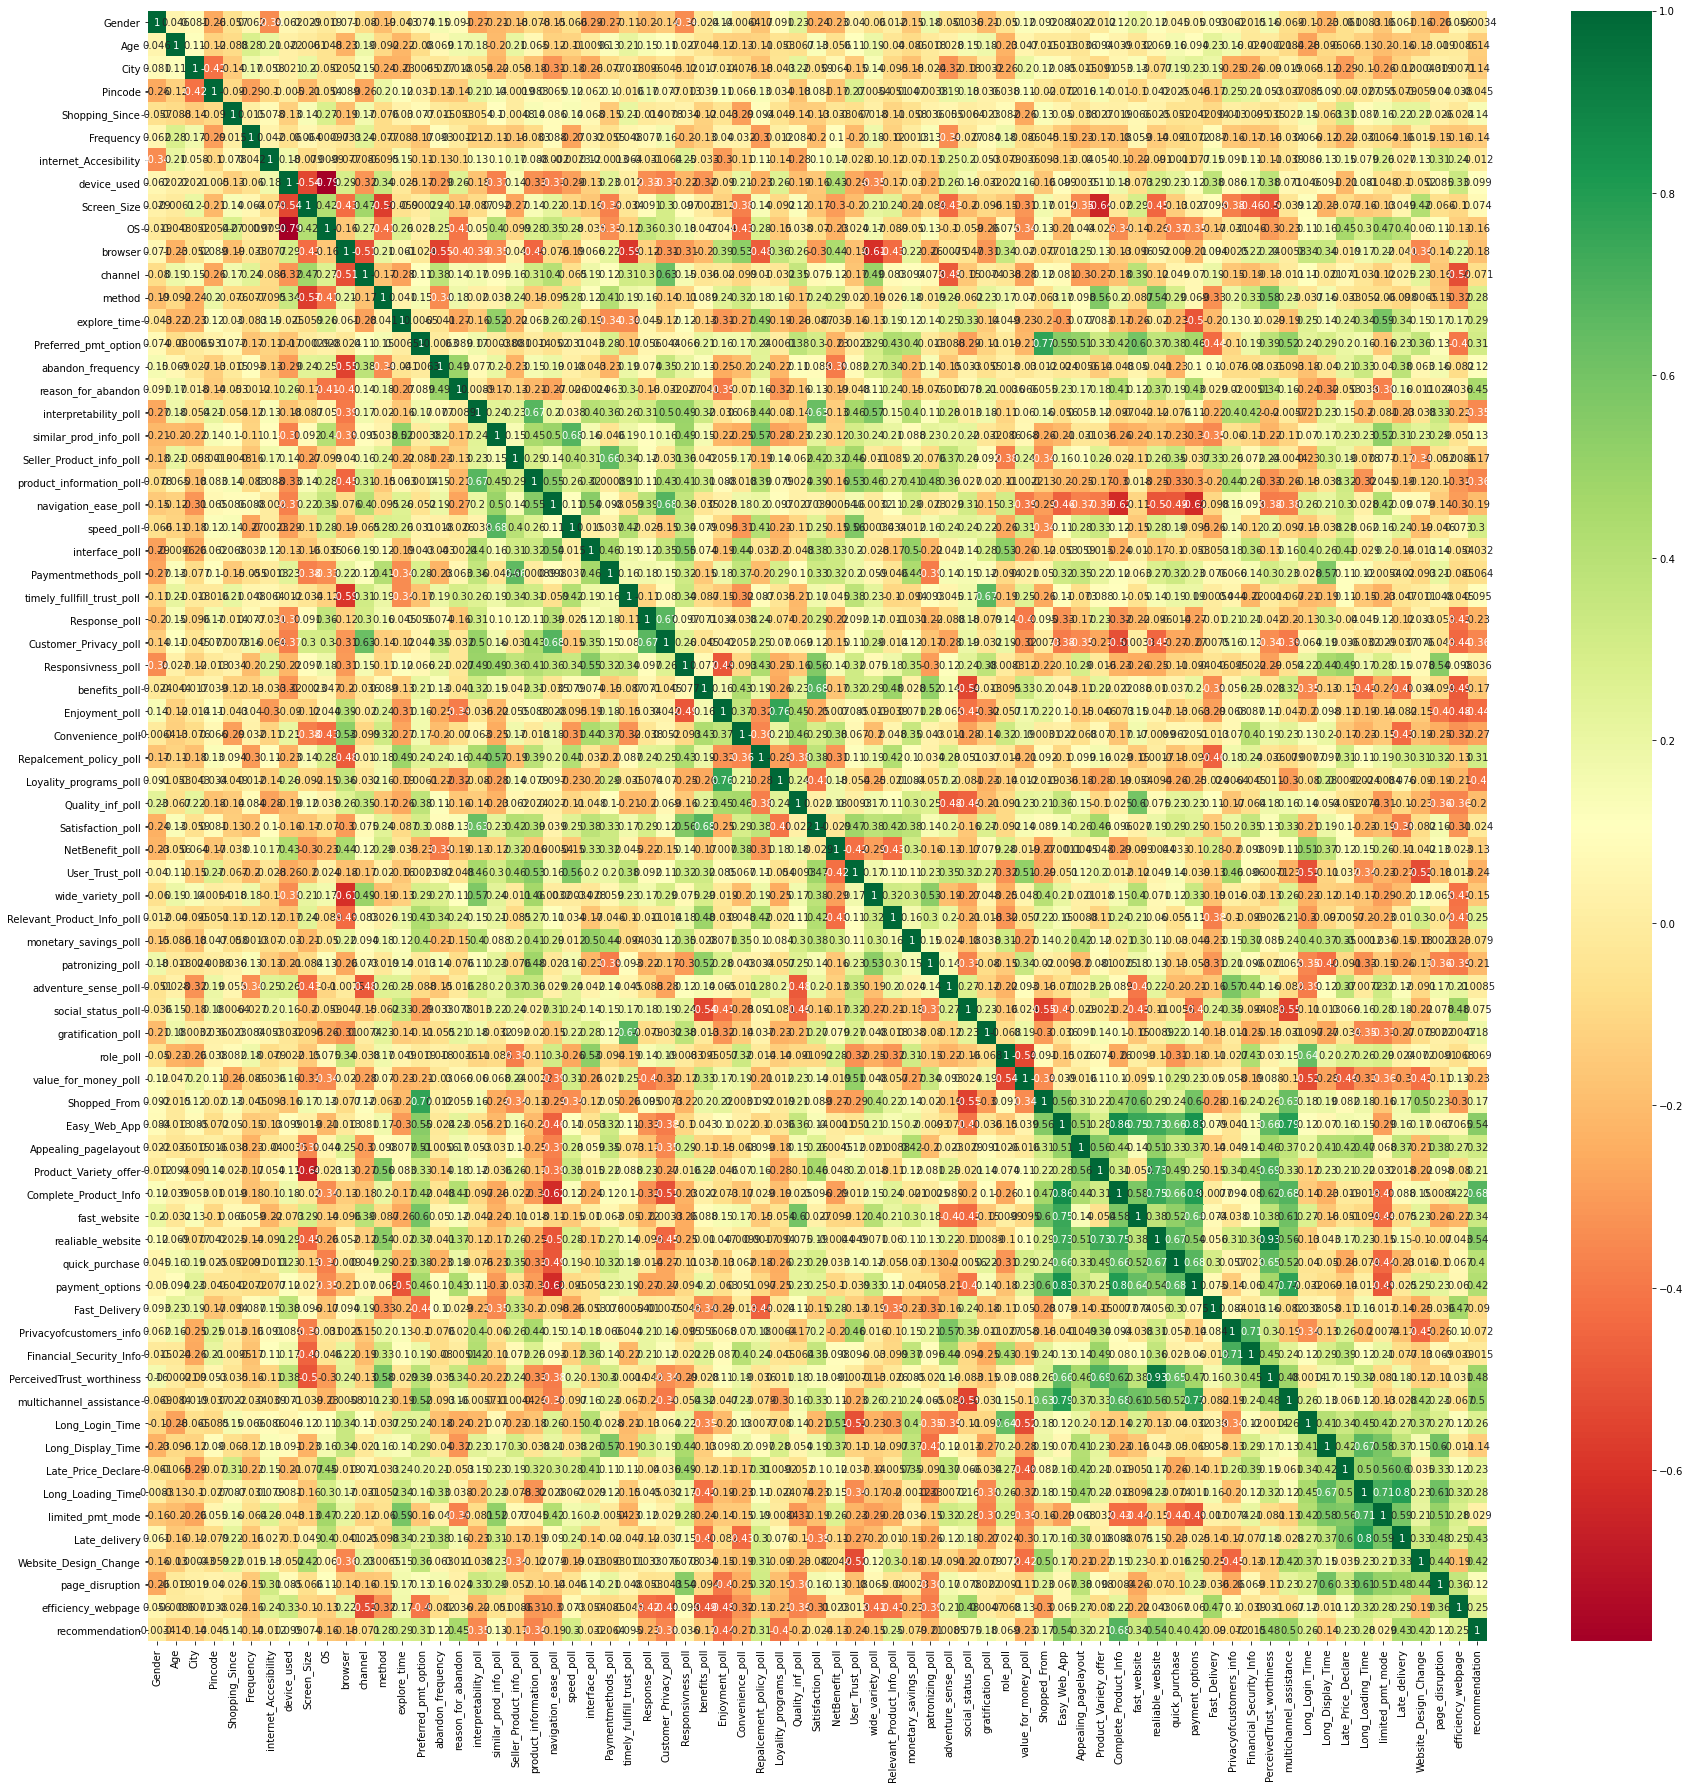

In [40]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

# Conclusion

1.According to my analysis,Most of the customers recommend Amazon on the basis of various factors like user friendly interface,fast delivey,payment options,customers personal and financial privacy.
2.Customers agree that e-commerce sites gives them value for money,attractive offers  and several benefits.
3.It is also observed that online shopping is not trustworthy and reliable to some customers due to lack of trust.
4.Most of the customers  prefer to use credit/debit card to pay.
5.Customer satisfaction plays a major role in customer retention.
Some important factors for customer satisfaction:-
 a. Discounts
 b. Benefits
 c. Timely delivery
 d. Good customer service
 e. Responsiveness
 f. Easy navigation
 g. Multi channel Assistance
 h. User friendly interface
 i. Information quality about the product
 j. Convinient payment methods
 k. Return & Replacement policy





